In [1]:
import networkx as nx
from load_data import load_data
from utils import plt_directed, nx_hist
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import powerlaw 
import matplotlib.pyplot as plt

In [2]:
from load_data import weighted_network_creation
Airport_Network = weighted_network_creation()

## Degree Distribution Analysis :

The density of a network is defined as:
$$D_{G}= \frac{L}{L_{max}}$$ where L max is the (theoretical) maximum number of links that could possibly exist.
Thus for directed networks, we have the following definition:
$$D_{G} = \frac{L}{N(N-1)}$$

In [3]:
print('The density value of our network is : ',nx.density(Airport_Network))

The density value of our network is :  0.0033751125562466264


A network is said to be sparse when $$ D_{G}<<1 (or <k> << N-1, or L << L_{max}).$$

Thus, we can conclude that **our network is sparse.**

The vast majority of real-world networks are sparse.
When a network is sparse, the vast majority of entries in the adjacency matrix are zero and it becomes an extremely inefficient method for representing, storing and analysing the network.
Hence a link list, or sparse matrix, formalism is what is almost always implemented in practice, as we did.

Moreover, dense networks (opposite of sparse network) are generally less suitable for network analysis. Thus it's better to study sparse network which is the case for us.

The **degree distribution (p(k))** of a network is the probability that a randomly selected node in the network has degree k.
Hence this is a probability distribution. We also denote the cumulative as P(k) which is the fraction of nodes with degree less than k.
For real-world networks the degree distribution ultimately comes from frequency (counts). Of course, in directed networks, “degree” is a more nuanced property. And hence, in our case, we have an **in-degree distribution and an out-degree distribution.**

In [4]:
def find_in_degree(G,n):
    '''
    Function for finding the in-degree
    ARGS :
        - G : Networkx graph object
        - n : Identifier of the node. Can be string or integer.
    '''
    return len(list(G.predecessors(n)))

In [5]:
def find_out_degree(G,n):
    '''
    Function for finding the out-degree
    ARGS :
        - G : Networkx graph object
        - n : Identifier of the node. Can be string or integer.
    '''
    return len(list(G.neighbors(n)))

In [6]:
def degree_distribution(G, yscale_input = 'linear', cumulative = False, distribution_name = 'Airport_Network'):
    '''
    ARGS :
        - G : networkx graph object of interest
        - yscale_input: String which should be 'linear' or 'log' indicating the scale of the y-axis.
    RETURN :
        - This function returns nothing but it plots the wanted histogram. None object is returned.
    '''
    # Find all the degree of each graph
    in_degree_G = [find_in_degree(G, n) for n in G.nodes()]
    out_degree_G = [find_out_degree(G, n) for n in G.nodes()]
    # Plot the graph in frequency in yscale_input scale
    nx_hist(in_degree_G, bins = 50, normed = False, yscale = yscale_input, title = f'In Degree Distribution of the {distribution_name} with {yscale_input} scale', xlabel = 'Degree', ylabel = 'Count')
    nx_hist(out_degree_G, bins = 50, normed = False, yscale = yscale_input, title = f'Out Degree Distribution of the {distribution_name} with {yscale_input} scale', xlabel = 'Degree', ylabel = 'Count')
    if cumulative :
        # Plot the cumulative version for each degree
        nx_hist(in_degree_G, bins = 50, normed = False, yscale = yscale_input, title = f'In Degree Distribution of the {distribution_name} with {yscale_input} scale in a cumulative form', xlabel = 'Degree', ylabel = 'Count', cumulative = True)
        nx_hist(out_degree_G, bins = 50, normed = False, yscale = yscale_input, title = f'Out Degree Distribution of the {distribution_name} with {yscale_input} scale in a cumulative form', xlabel = 'Degree', ylabel = 'Count', cumulative = True)
    if yscale_input == 'linear':
        analysis_power_law(G, G.in_degree(), distribution_name = f'{distribution_name} in-degree')
        analysis_power_law(G, G.out_degree(), distribution_name = f'{distribution_name} out-degree')

**To find out which distribution is a better fit, we used the distribution_compare() function.** This process allows us to find R and p values :
   * $R$ is the loglikelihood ratio between two candidate distributions (for example, between the power law distribution and the exponential distribution). If $R$ is positive, the data is more likely to follow the first distribution. If $R$ is negative, the data is more likely to follow the second distribution.
   * $p$ is the significant value. If $p<0.05$, we conclude that the fits are significantly different. For example, if $R>0$, and $p<0.05$, we conclude that the first candidate distribution is significantly better at fitting the data than the second candidate distribution.


In [7]:
def fit_power_law(G, distribution_1 = 'power_law', distribution_2 = 'exponential', exponent_pl = True, in_degree_pairs_G = None, distribution_name = 'None'):
    '''
    This function allows the fitting of a distribution of a graph, 
    the plotting of the data with two defined law and the comparison between two laws.
    ARGS :
        - G : Graph Networkx object giving us the in degree distribution.        
        - distribution_1 : string corresponding to the name of the first law use in the graph and in the comparison calculation
        - distribution_2 : string corresponding to the name of the second law use in the graph and in the comparison calculation
        - exponent_pl : Boolean defining if you want to print the alpha exponent of the power law
        - in_degree_pairs_G : Distribution we want to analyse. For example can be equal to G.in_degree()
        - distribution_name : String use in the title and the legend of the graph
    RETURN :
        - R : Float corresponding to the loglikelihood ratio between two candidate distributions.
        - p : Float corresponding to the significant value.
    '''
    
    # List containing the in degree of each node
    in_degree_G = zip(*in_degree_pairs_G)
    in_degree_G = list(list(in_degree_G)[1])
    # Sort the list in increasing order
    in_degree_G.sort()

    # Fit and plot on the same figure
    fit = powerlaw.Fit(in_degree_G)
    fig = fit.plot_ccdf(color='b', linewidth=2, label='Fit of the in-degree')
    # Dictionary containing the different fit values :
    if (distribution_1 == 'power_law') | (distribution_2 == 'power_law'):
        fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig, label='Fitted power law')
    if (distribution_1 == 'exponential') | (distribution_2 == 'exponential'):   
        fit.exponential.plot_ccdf(color='g', linestyle='--', ax=fig, label='Fitted exponential')
    if (distribution_1 == 'lognormal') | (distribution_2 == 'lognormal'):
        fit.lognormal_positive.plot_ccdf(color='y', linestyle='--', ax=fig, label='Fitted log-normal')
    plt.title(f'Fit of the {distribution_name} distribution with the fitted {distribution_1}, and the fitted {distribution_2} :')
    plt.legend()
    plt.show()
    
    if exponent_pl == True :
        # print the max, min and mean in_Degree in the table format with two columns
        print('Network statistics :')
        print('{:^30}\t{:^7}'.format('Minimum in_degree:', in_degree_G[0]))
        print('{:^30}\t{:^7}'.format('Maximum in_degree:', in_degree_G[-1]))
        print('{:^30}\t{:^7}'.format('Mean number in_degree:', sum(in_degree_G)/len(in_degree_G)))
        # Find the exponent of the powerlaw
        print('\nFitted parameter alpha of the power law distribution: {:.3f}'.format(fit.power_law.alpha))
        print('Standard error of alpha: {:.3f}'.format(fit.power_law.sigma))
    
    # Find the R and p values
    R, p = fit.distribution_compare(distribution_1, distribution_2)
    print(f'\nHere you find the R and p value for comparison between {distribution_1} and {distribution_2} :')
    print('R = {:.5f}'.format(R))
    print('p = {:.5f}'.format(p))
    
    return R, p

In [8]:
def analysis_power_law(G, in_degree_pairs_G, distribution_name):
    '''
    This functions allows an analysis of a distribution. It try different law to fit the distribution and output graph and the best law.
    ARGS :
        - G : Graph Networkx object giving us the in degree distribution.        
        - in_degree_pairs_G : Distribution we want to analyse. For example can be equal to G.in_degree()
        - distribution_name : String use in the title and the legend of the graph
    RETURN :
        - None object is returned but graph and information are displayed on user interface.
    '''
    distribution = ['power_law', 'exponential', 'lognormal']
    two_best = []
    # Find the R and p values for each comparison
    R_1, p = fit_power_law(G, distribution[0], distribution[1], exponent_pl = False, in_degree_pairs_G = in_degree_pairs_G, distribution_name = distribution_name)
    if R_1 > 0 : # means that the power law is best thus we test the two other
        two_best.append(distribution[0])
        R_2, p = fit_power_law(G, distribution[1], distribution[2], exponent_pl = False, in_degree_pairs_G = in_degree_pairs_G, distribution_name = distribution_name)
        if R_2 > 0 :
            two_best.append(distribution[1])
            print(f'In this case, the best law is {distribution[1]}.\n')
        else : 
            two_best.append(distribution[2])
            print(f'In this case, the best law is {distribution[2]}.\n')
    else : 
        two_best.append(distribution[1])
        R_2, p = fit_power_law(G, distribution[0], distribution[2], exponent_pl = False, in_degree_pairs_G = in_degree_pairs_G, distribution_name = distribution_name)
        if R_2 > 0 :
            two_best.append(distribution[0])
            print(f'In this case, the best law is {distribution[0]}.\n')
        else : 
            two_best.append(distribution[2])
            print(f'In this case, the best law is {distribution[2]}.\n')
    print(f'The two best distributions are : {two_best[0]} and {two_best[1]}')

    R_3, p = fit_power_law(G, two_best[0], two_best[1], exponent_pl = False, in_degree_pairs_G = in_degree_pairs_G, distribution_name = distribution_name)
    best_law = []
    if R_3 > 0 :
        best_law.append(two_best[0]) 
    else :
        best_law.append(two_best[1]) 
    print(f'The best distribution is : {best_law[0]}')

Degree Distribution for each network using Linear-Linear Scale : 



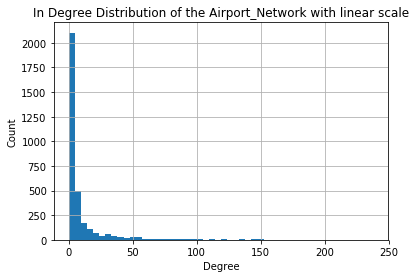

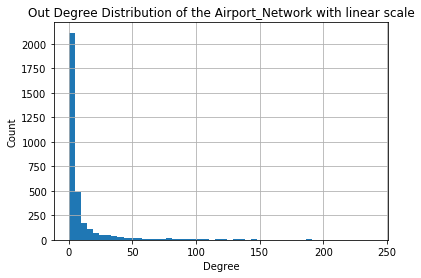

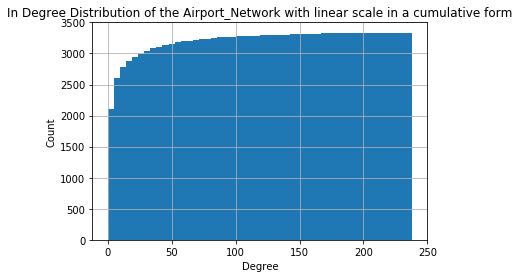

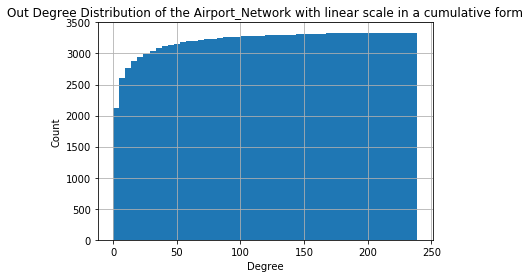

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


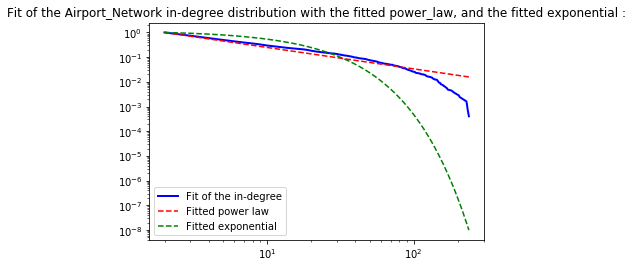


Here you find the R and p value for comparison between power_law and exponential :
R = 1395.16913
p = 0.00000


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


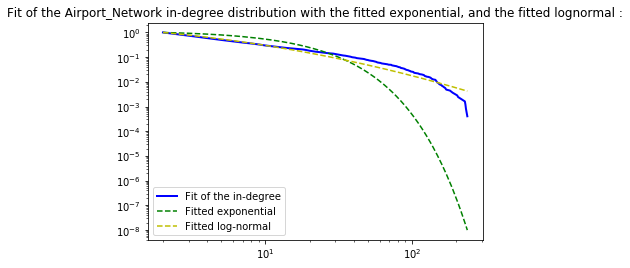


Here you find the R and p value for comparison between exponential and lognormal :
R = -1395.15462
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


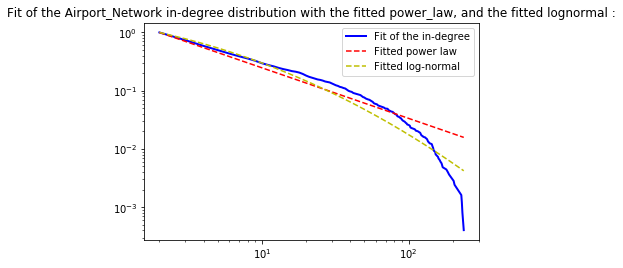


Here you find the R and p value for comparison between power_law and lognormal :
R = 0.01451
p = 0.83479
The best distribution is : power_law


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


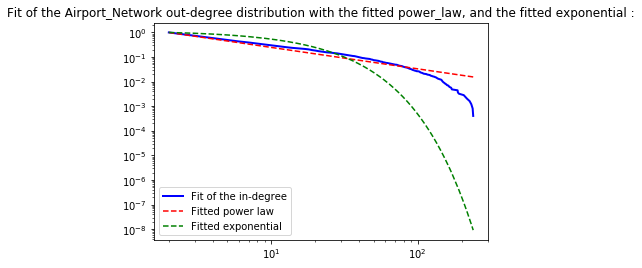


Here you find the R and p value for comparison between power_law and exponential :
R = 1412.98089
p = 0.00000


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


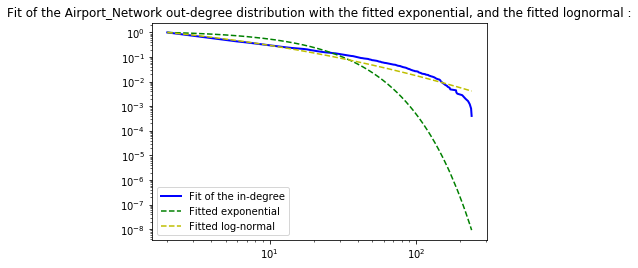


Here you find the R and p value for comparison between exponential and lognormal :
R = -1412.95458
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


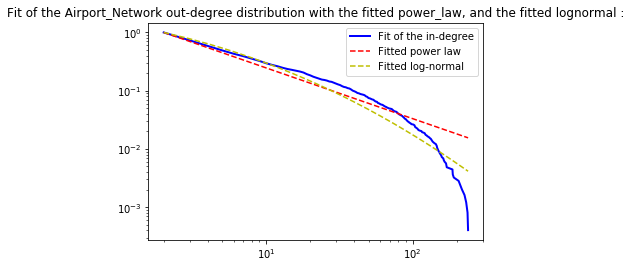


Here you find the R and p value for comparison between power_law and lognormal :
R = 0.02631
p = 0.52810
The best distribution is : power_law

Degree Distribution for each network using Log-Linear Scale (y-axis being log scaled): 



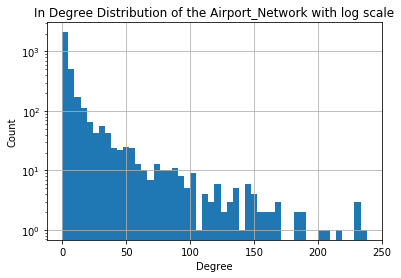

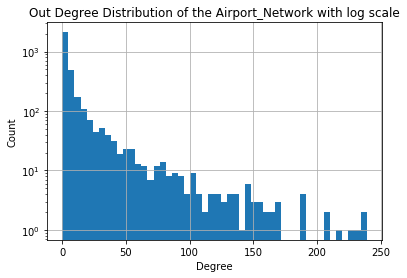

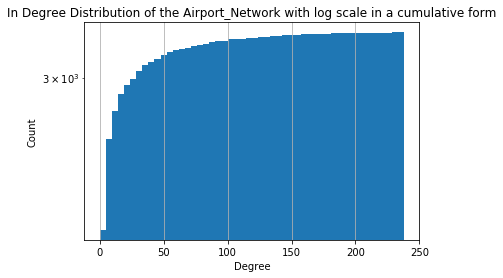

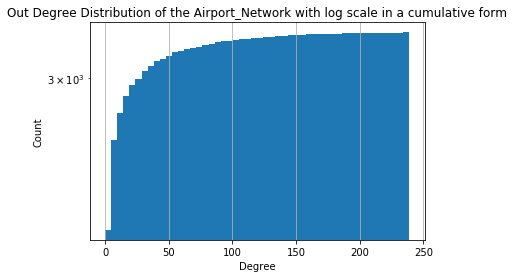

In [9]:
print(f'Degree Distribution for each network using Linear-Linear Scale : \n') 
degree_distribution(Airport_Network, yscale_input = 'linear', cumulative = True)
print(f'\nDegree Distribution for each network using Log-Linear Scale (y-axis being log scaled): \n')
degree_distribution(Airport_Network, yscale_input = 'log', cumulative = True)

**Conclusion that can be drawn from this distribution analysis:**

   * The first things that can be seen is the similarity between the IN degree distribution and the OUT degree distribution. In fact, we will analyze both at the same time as the distribution is similar meaning that the conclusion that can be drawn for one stand for the other.

   * There is a **high number of low degree node and a low number of high degree node.** In fact, the cumulative histogram is a nice illustration of this high number of low degree node compare to the number of high degree nodes. This fact means that on average, airports propose a small subset of lines to the customers while some airports are big hubs making the bridge between all these smalls networks.
   
   * The **average in degree of the network is identical to the average out degree and is 10.9766**. It makes sense that the two average degrees are the same when we think about the phenomena we are studying: plane routes. Moreover, it means that the two distribution needs to be centered around 11 which is the case. **It make sense because in our case, as letting a plane on the ground is a huge finantial lost, thus the in and out degree should be similar.**

   * The **log scale** is more appropriate to describe this distribution. In fact, the evolution of the decrease of the frequency when the degree increase is more visible thanks to this scale. In addition, all these histograms have the same meaning that will be described just below. 

   * The distribution seems to have a **decreasing exponential trend**. In fact, both scales are a nice illustration of the decrease of the frequency when the degree increase.
   
   * The size of the **right tail is very high**. It indicates the presence of several extreme values. This fact is easier to be seen on the log scale histogram. Thus, it again underlines the high number of low degree node and the low number of high degree node. As an example of these extreme values, you can see that one node is connected to 250 other nodes, which correspond to 7.2% of the network. This node is 25 times more connected than an average node.

   * For both distributions, the **peak of the distribution** is centered at the origin. This is not unusual. Thus, it generally implies nothing special.
   
   * As you can see above, the two best distributions are the **power-law distribution for both in and out degree**. It makes sense as the distributions of the degrees are similar. In fact, the exponential distribution is always worst compared to log-normal or power law. In addition, we notice that the R-value is extremely low and p is superior to 0.05 when the log-normal and the power low distribution are compared. Thus we can't conclude that the power law is better at fitting the data compared to the log-normal. This fact is indeed not significant taking into account the p-value. These kinds of broad distributions have a number of implications: **Hubs can be hugely connected and play big roles, these networks have no intrinsic scale, these networks can be universal, they are very likely to be a small world (hubs span local areas). Points 1 and 2 are general properties of any broad (broader than exponential) distribution.**

***Thanks to the previous analysis, we conclude that airports can be divided into two kinds: the majority would have a small number of connections to other airports while a small part of them have a huge degree. In and out degree are the same meaning that this fact is true for connection from and to the same airport. The average number of connections going in or out an airport is 11 routes. The distribution indicates that hubs can be hugely connected, and can be universal.***

## Connectivity

In directed networks, a strongly connected component is a subgraph in which each node is reachable from each other node.
A weakly connected component is a subgraph in which each node is reachable from each other node if the directed links are replaced by undirected links.
In large directed networks this can be tremendously taxing to compute.

In [10]:
from load_data import weighted_network_creation
Airport_Network_weighted = weighted_network_creation()

In [11]:
print('Is the graph weakly connected : ', nx.is_weakly_connected(Airport_Network_weighted), '. In fact, the graph have ', nx.number_weakly_connected_components(Airport_Network), ' weakly connected component')
print('Is the graph strongly connected : ', nx.is_strongly_connected(Airport_Network_weighted), '. In fact, the graph have ', nx.number_strongly_connected_components(Airport_Network), ' strongly connected component')
dict_SCC = nx.strongly_connected_components(Airport_Network_weighted)
dict_WCC = nx.weakly_connected_components(Airport_Network_weighted)

Is the graph weakly connected :  False . In fact, the graph have  7  weakly connected component
Is the graph strongly connected :  False . In fact, the graph have  40  strongly connected component


Infos on the largest Strongly Connected Component subgraph :
 Name: 
Type: DiGraph
Number of nodes: 3268
Number of edges: 37407
Average in degree:  11.4465
Average out degree:  11.4465


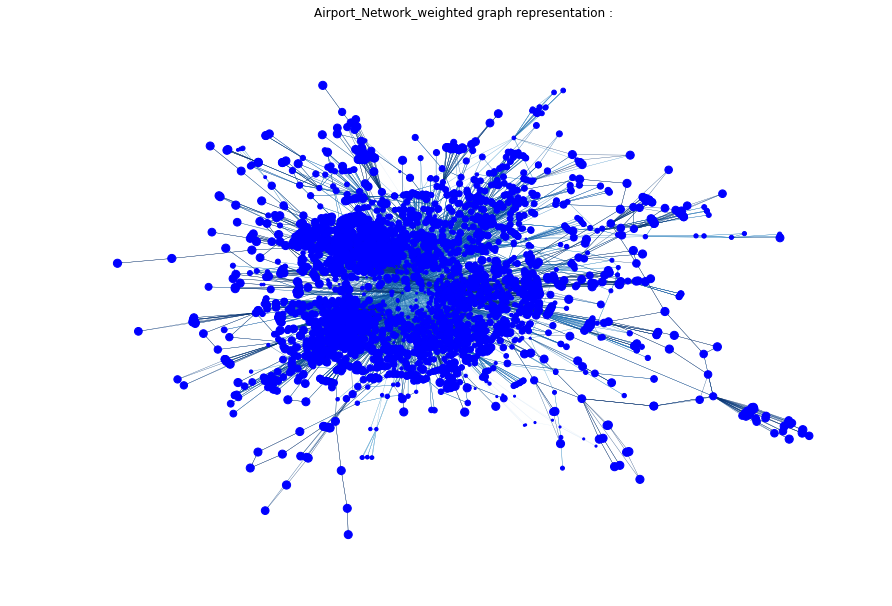

Infos on the largest Weakly Connected Component subgraph :
 Name: 
Type: DiGraph
Number of nodes: 3308
Number of edges: 37459
Average in degree:  11.3238
Average out degree:  11.3238


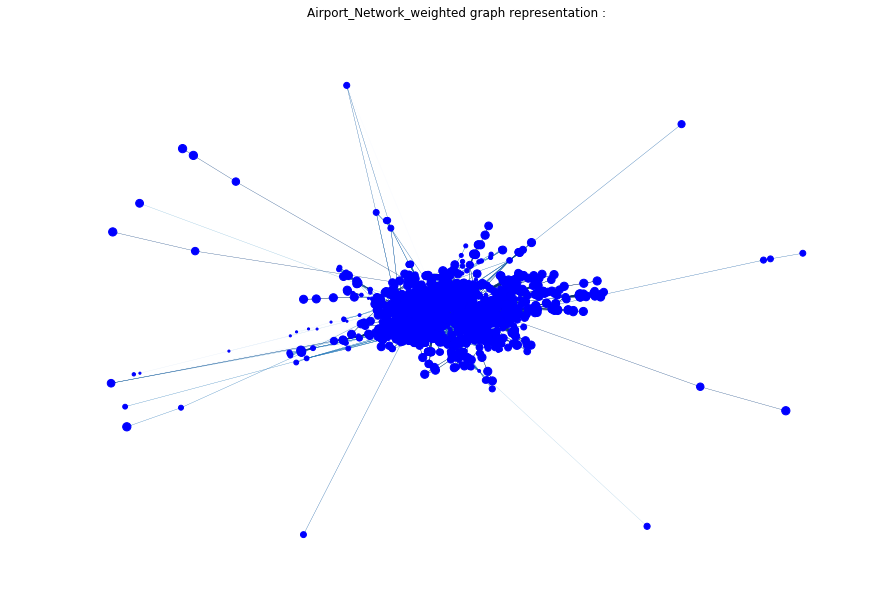

In [12]:
max_SCC = max(nx.strongly_connected_component_subgraphs(Airport_Network_weighted), key=len)
max_WCC = max(nx.weakly_connected_component_subgraphs(Airport_Network_weighted), key=len)
print('Infos on the largest Strongly Connected Component subgraph :\n', nx.info(max_SCC))
plt_directed(max_SCC, 'Airport_Network_weighted graph representation :\n')
print('Infos on the largest Weakly Connected Component subgraph :\n', nx.info(max_WCC))
plt_directed(max_WCC, 'Airport_Network_weighted graph representation :\n')

In [13]:
print(f'{len(max_SCC.node)} nodes are in the largest SCC over {len(Airport_Network.node)} which represent {len(max_SCC.node)/len(Airport_Network_weighted.node)*100} of the graph nodes')
print(f'{len(max_WCC.node)} nodes are in the largest WCC over {len(Airport_Network.node)} which represent {len(max_WCC.node)/len(Airport_Network_weighted.node)*100} of the graph nodes')

3268 nodes are in the largest SCC over 3334 which represent 98.02039592081584 of the graph nodes
3308 nodes are in the largest WCC over 3334 which represent 99.22015596880624 of the graph nodes


A **weakly connected component** is a maximal subgraph of a directed graph such that for every pair of vertices u, v in the subgraph, there is an undirected path from u to v and a directed path from v to u.
On the opposite, a graph is said to be **strongly connected** if every vertex is reachable from every other vertex. The strongly connected components of an arbitrary directed graph form a partition into subgraphs that are themselves strongly connected.

In our case, we found that the largest Strongly connected graph from Airport_Network graph represent 98 % of the entire set of nodes of the network while the largest weakly connected component represent 99.2% of the network. 

The first surprising fact is that **the largest weakly connected component is not representing 100% of the network.** In fact, this means that **some airports are not reachable at all and are not connected to all Airport_Network. It's like independent networks by themselves, isolated from the world.** This was not expected as the goal of the planes network is traveling around the world. In fact, with the globalization, the majority part of the world have been made reachable by plane. **One explanation for this observation is the possible existence of small independent networks of small flights for example in a place like Polynesia.** Indeed, Polynesia is made of a collection of small island containing only small airports allowing just small planes to take off. Perhaps, if you wanted to go and visit the entire collection of islands you would take a big plane from Switzerland and land in a huge airport. Then, you would take a bus to go to a smaller airport taking a smaller plane to go and visit the island. This process would create a small independent network explaining this percentage.

Then, the second fact that is important to understand is the meaning of the percentage of nodes in the largest strongly connected network. This percentage is extremely high. In fact, it means that from an airport A, you are able to go to 98% of the entire collection of the world's airports taking a sequence of planes. **It makes the large majority of airports (98%) reachable from anywhere in the network.**

***Thus as a conclusion, we can point out that the large majority of airports (98%) are reachable from anywhere in the network and that some independent networks isolated from the entire network exist in small proportion.***

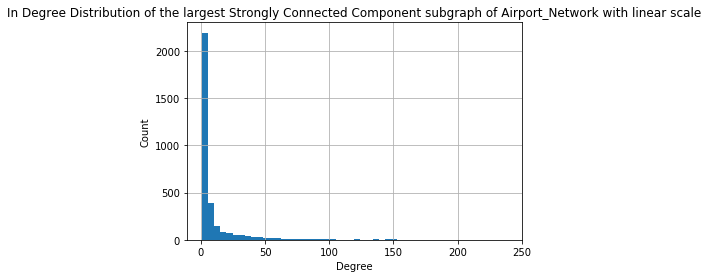

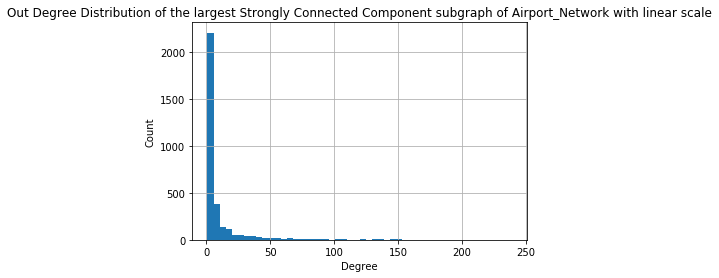

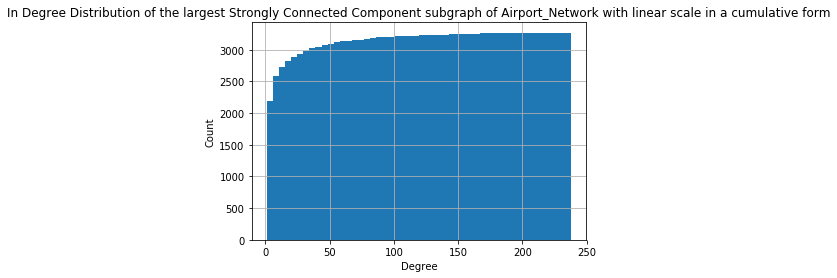

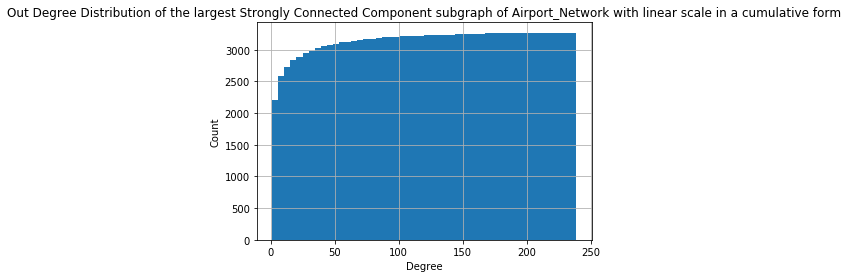

Calculating best minimal value for power law fit
/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


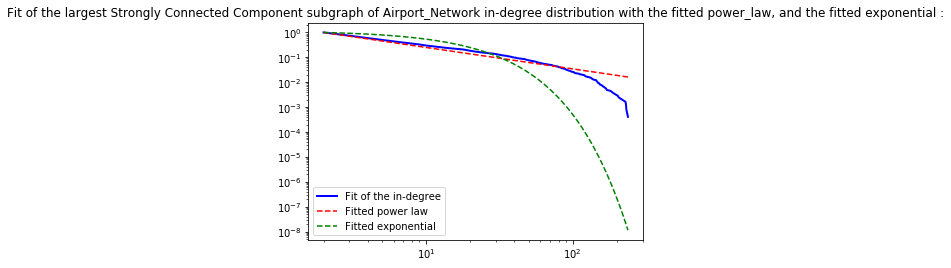


Here you find the R and p value for comparison between power_law and exponential :
R = 1366.95193
p = 0.00000


Calculating best minimal value for power law fit


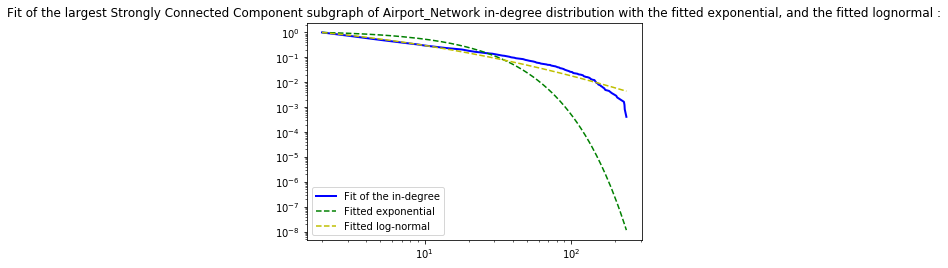


Here you find the R and p value for comparison between exponential and lognormal :
R = -1366.96298
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Calculating best minimal value for power law fit


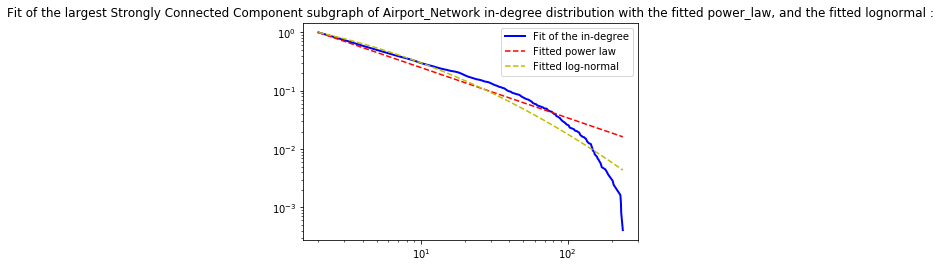


Here you find the R and p value for comparison between power_law and lognormal :
R = -0.01105
p = 0.92021
The best distribution is : lognormal


Calculating best minimal value for power law fit


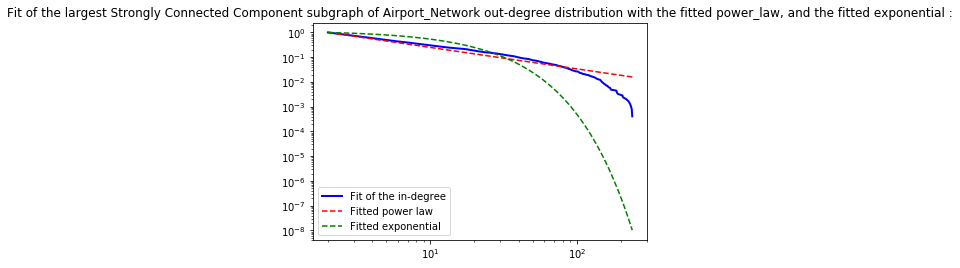


Here you find the R and p value for comparison between power_law and exponential :
R = 1388.72668
p = 0.00000


Calculating best minimal value for power law fit


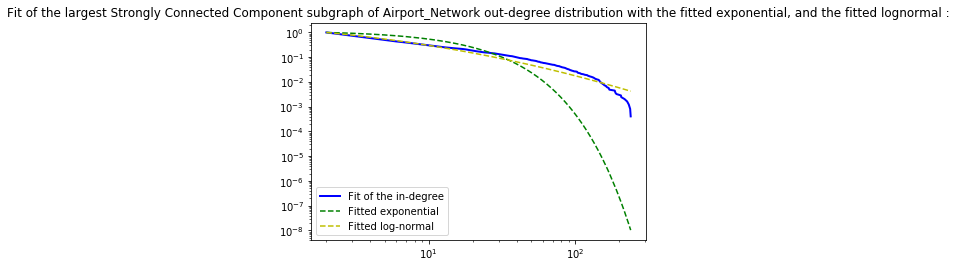


Here you find the R and p value for comparison between exponential and lognormal :
R = -1388.70839
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Calculating best minimal value for power law fit


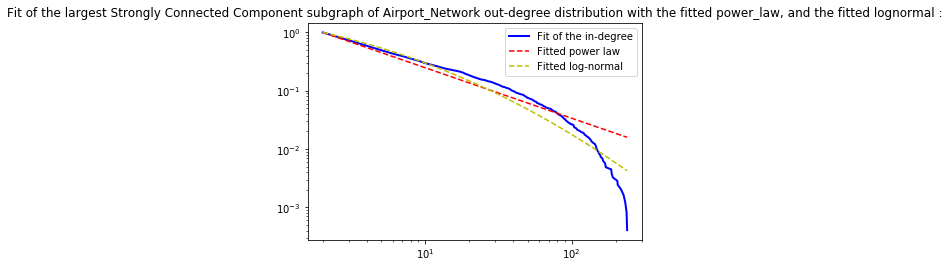


Here you find the R and p value for comparison between power_law and lognormal :
R = 0.01829
p = 0.76208
The best distribution is : power_law


In [14]:
degree_distribution(max_SCC, yscale_input = 'linear', cumulative = True, distribution_name = 'largest Strongly Connected Component subgraph of Airport_Network')

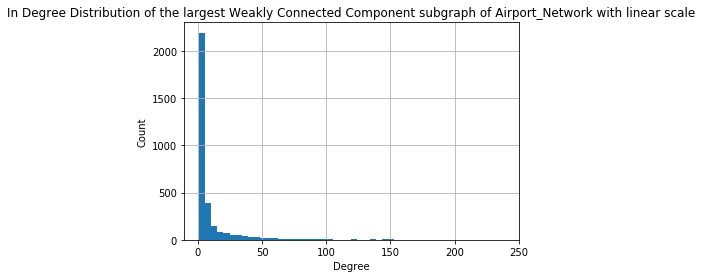

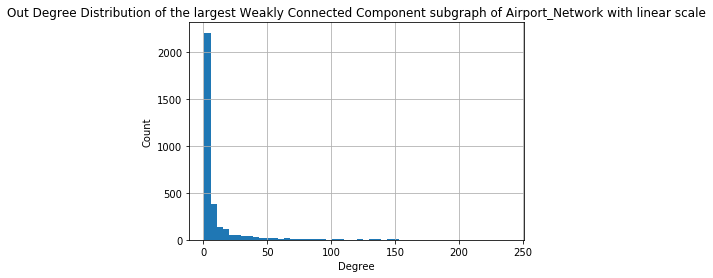

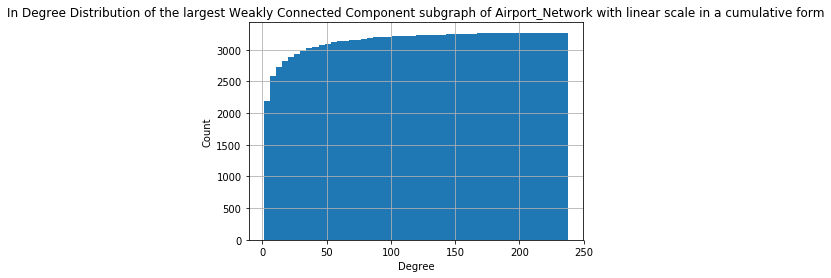

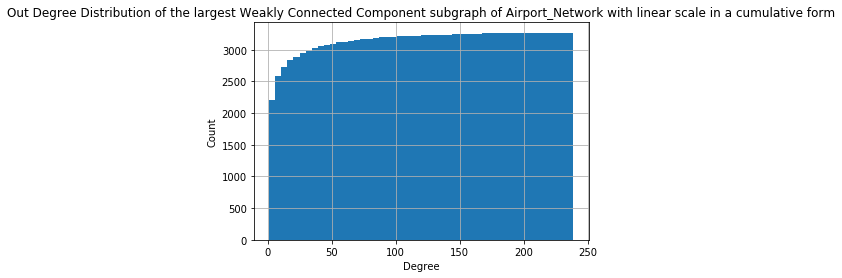

Calculating best minimal value for power law fit
/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


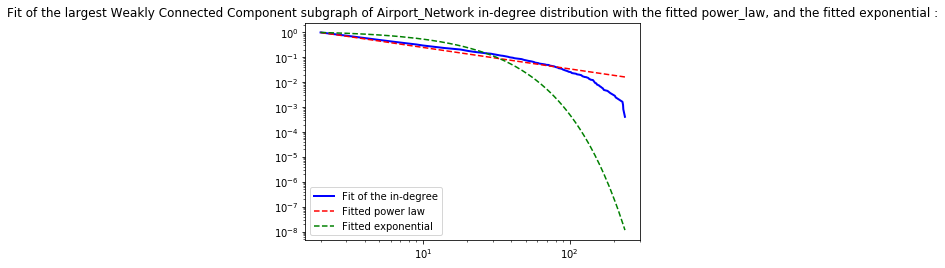


Here you find the R and p value for comparison between power_law and exponential :
R = 1366.95193
p = 0.00000


Calculating best minimal value for power law fit


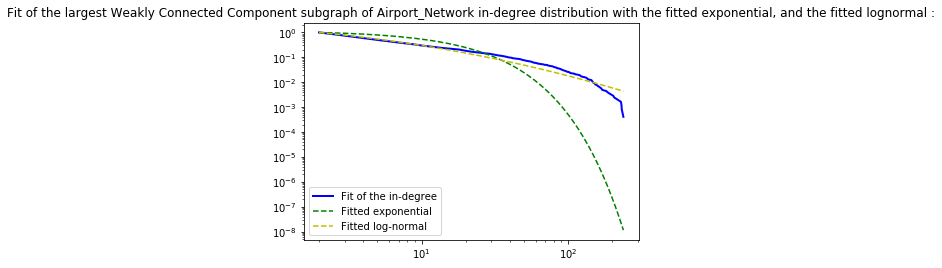


Here you find the R and p value for comparison between exponential and lognormal :
R = -1366.96298
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Calculating best minimal value for power law fit


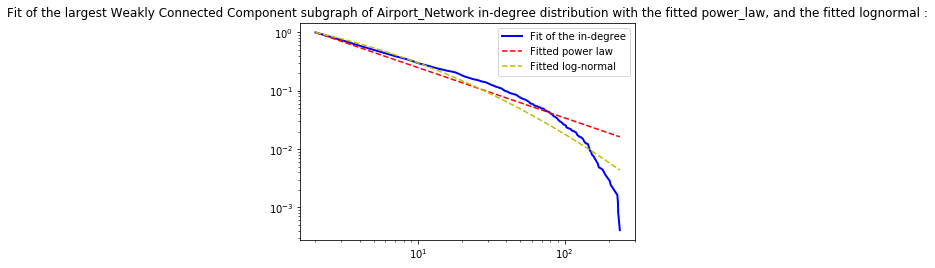


Here you find the R and p value for comparison between power_law and lognormal :
R = -0.01105
p = 0.92021
The best distribution is : lognormal


Calculating best minimal value for power law fit


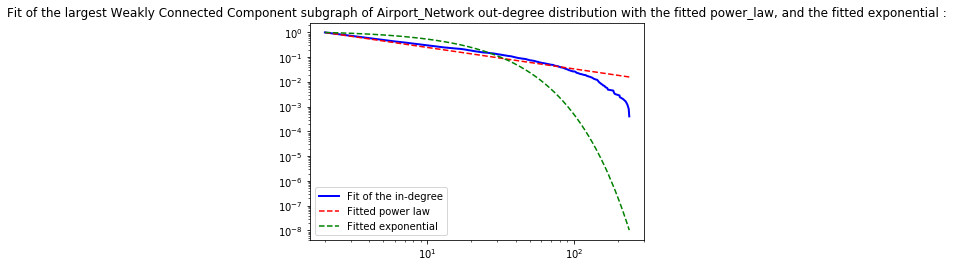


Here you find the R and p value for comparison between power_law and exponential :
R = 1388.72668
p = 0.00000


Calculating best minimal value for power law fit


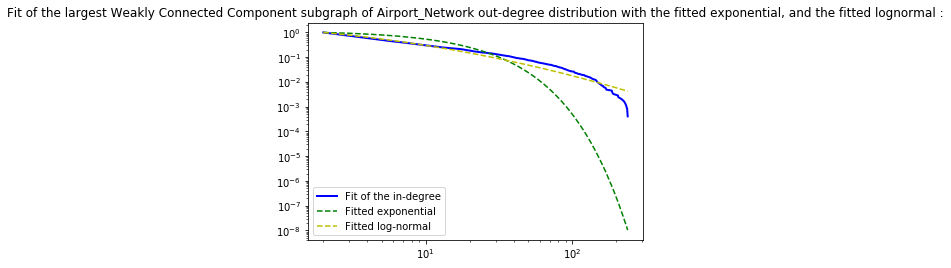


Here you find the R and p value for comparison between exponential and lognormal :
R = -1388.70839
p = 0.00000
In this case, the best law is lognormal.

The two best distributions are : power_law and lognormal


Calculating best minimal value for power law fit


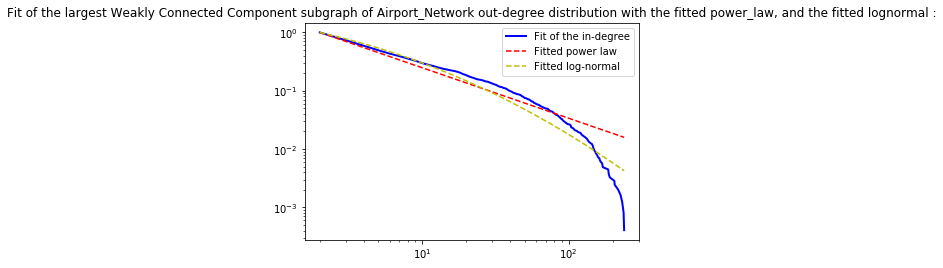


Here you find the R and p value for comparison between power_law and lognormal :
R = 0.01829
p = 0.76208
The best distribution is : power_law


In [15]:
degree_distribution(max_SCC, yscale_input = 'linear', cumulative = True, distribution_name = 'largest Weakly Connected Component subgraph of Airport_Network')

As you have seen, the largest Strongly and Weakly Connected component subgraphs are representing 98% and 99.2% of the entire network. As we could have imagined, the distribution analysis on both connected component gives slightly the same result as the one conducted on the entire network. **Thus, none additional conclusion can be drawn.**

## Network Distance

In networks, our concept of distance is completely reshaped.
Physical distance no longer matters, only the number of links one must transverse to get from one node to another become important.
Indeed, the number of Euclidean dimensions required to embed a network such that all physical distances match network distances is enormous, even for simple networks.
Here we will deal with three specific matters concerning network distance:
   * Shortest Paths
   * Network Diameter
   * Average path length
   
**Shortest paths:** 
The shortest path between a pair of nodes is a path between the two that requires the transversal of the fewest links. 
For each pair of nodes for which a walk (and hence a path) exists, at least one shortest path between them.
The distance between two nodes is defined as the number of links one must transverse along the shortest path to get from one to the other.
In a directed network, these definitions all hold. However, d(i,j) is not necessarily equal to d(j, i) and extra care must be taken in calculations.

However, in weighted networks shortest paths takes on an entirely different level of complexity. In our case, the weight is a capacity of the link. Thus, the shortest path is the one for which total **weight is maximized.** 

In [16]:
# Find the shortest path for each node in the graph next to the floyd warchall method and output it in a numpy array
max_SCC_shortestpath = nx.floyd_warshall_numpy(max_SCC)
max_WCC_shortestpath = nx.floyd_warshall_numpy(max_WCC)

** Diameter:**
A network’s diameter is the longest shortest path among all nodes in a network.
As diameter is trivially infinity for a disconnected network, we typically consider only the GCC (undirected) or largest SCC (directed).
Even in very large networks, the diameter can be quite small. Diameter can be a coarse measure, however, as it deals with only a single (extreme) pair of
nodes.

We can't find the diameter for the entire graph and for the weakly connected component as a graph not connected will have infinite path length.

In [17]:
# The diameter calculation
max_SCC_diameter = nx.diameter(max_SCC)
print(f'The diameter of the bigger Strongly connected component of Airport_Graph is : {max_SCC_diameter}')
# The diameter calculation
max_WCC_diameter = nx.diameter(max_WCC.to_undirected())
print(f'The diameter of the bigger Weakly connected component of Airport_Graph is : {max_SCC_diameter}')

The diameter of the bigger Strongly connected component of Airport_Graph is : 13
The diameter of the bigger Weakly connected component of Airport_Graph is : 13


**Average path Length:**
A network’s average path length, or even path length distribution, offers a more nuanced view of distances within the network.
As the name implies, it is simply the average of all node-node shortest path lengths.

In [18]:
# The average shortest path length
max_SCC_avg_shortestpath_weighted = nx.average_shortest_path_length(max_SCC, weight = 'Weight')
print(f'The weighted average shortest path length of the bigger Strongly connected component of Airport_Graph is : {max_SCC_avg_shortestpath_weighted}')
max_WCC_avg_shortestpath_weighted = nx.average_shortest_path_length(max_WCC, weight = 'Weight')
print(f'The weighted average shortest path length of the bigger Weakly connected component of Airport_Graph is : {max_WCC_avg_shortestpath_weighted}')

The weighted average shortest path length of the bigger Strongly connected component of Airport_Graph is : 4.997577776953542
The weighted average shortest path length of the bigger Weakly connected component of Airport_Graph is : 4.956640287777676


In [19]:
df_duplicates = pd.read_csv('./openflights/out.openflights', sep = ' ')
# Rename columns to give meaningful names
df_duplicates = df_duplicates.rename(columns = {'%':'Source_Node', 'asym':'Target_Node', 'positive':'Weight'})
# Define a weight of 1 for each node
df_duplicates['Weight'] = 1
# Summation of the duplicate edges by storing the sum values in the 'weight' column
df_weighted = df_duplicates.groupby(['Source_Node', 'Target_Node']).sum().reset_index()
df_weighted.head()
# Proportion of weight equal to one
df_weighted[df_weighted.Weight == 1].shape[0]/df_weighted.shape[0]*100

56.278760473467216

In [20]:
# Proportion of weights inferior to 4
df_weighted[df_weighted.Weight < 4].shape[0]/df_weighted.shape[0]*100

91.50950924325043

** Diameter:**

The diameter of the largest Strongest component is 14 nodes and the one corresponding to the undirected weakly component is the same. To have the diameter of the weakly component, a conversion to an undirected have been done to allow the calculation as a graph not connected will have infinite path length. This value of diameter is not high and it means that the network is well connected. 

For the average shortest path, we are in the same case as for the diameter. In fact, the Strongest Connected component of our Airport_network has an average shortest path of 3.98 nodes and the average shortest path of the weakly component and of the both weighted version have all the same value. 

These results illustrate 5 important characteristics of the network:
   * As we could have expected, as the Strongly Connected component represents 98% of the entire graph and the weakly connected component represent 99.2% of the entire graph, **the average shortest path and the diameter should be nearly the same for weakly and strong component.**
   * This value of diameter is not high (for connecting more than 3000 nodes) and thus it **means that the network is well connected/linked.** If a passenger chooses the wrong destination, he had to take 14 flights in the worst case.
   * This shortest path of 4, which **is small**, means that a passenger has to take an average of 4 flights to go anywhere on the earth.
   * The average shortest path is also small. It means **that nodes are really well connected between each other.** The first explanation coming would be that the network is dense and it would explain this number. However, as we saw at the beginning of the report, our network is sparse. Thus it means that there is another explanation. Indeed, this low average shortest means that the **network is made of small subnetworks connected together and  link to other subnetworks by weak ties.** In fact, such a structure would explain this number. If it's true, this **hypothesis will be verified at the end of the report during the community analysis.**
   * The other characteristic point out is that **the weights should not have a real effect on this measure.** The explanation can come from the **high number of weight equal to 1.** In fact, as you can see above, the proportion of weights equal to one is 56% and the proportion of weights inferior to 4 is 91%. It means that the majority of weights are low. It would also add information. **The edges forming the small subnetwork are 1 in majority.**

Now, we will study the nodes having min and max values for these values :

In [21]:
def n_function_average_shortest(G, function = 'max', n = 10):
    '''
    This function allows to find the n nodes with the highest or lowest average shortest path length to each other node in the network
    ARGS :
        - G : networkx graph object.
        - function : String which should be max or min defining if we take the highest or the lowest nodes.
        - n : Interger defining how many highest or lowest nodes we select.
    RETURN :
        - n_output : List corresponding to the id of the n highest or lowest node in the G network.
    '''
    n_output = []
    G_GCC_shortestpath = nx.floyd_warshall_numpy(G)
    df_G_GCC = pd.DataFrame(np.mean(G_GCC_shortestpath, axis = 1), columns = {'Shortest_path_average'})
    if function == 'min':
        n_output = df_G_GCC.sort_values(by = 'Shortest_path_average')[:n]
    elif function == 'max':
        n_output = df_G_GCC.sort_values(by = 'Shortest_path_average')[-n:]
    return n_output


def min_and_max(G_GCC, n = 10):
    '''
    This function allows the finding of the n highest or lowest node thanks to the n_function_average_shortest() functions and put it in a good format for printing
    ARGS :
        - G_GCC : networkx graph object corresponding to the Giant Connected Component of the graph of interest.
        - n : Interger defining how many highest or lowest nodes we select.
    RETURN : 
        - node_max : Dataframe containing the id of the node and the shortest path average of the n highest nodes.
        - node_min : Dataframe containing the id of the node and the shortest path average of the n lowest nodes.
    '''
    node_min = n_function_average_shortest(G_GCC, function = 'min', n = n)
    node_max = n_function_average_shortest(G_GCC, function = 'max', n = n)
    node_min = node_min.reset_index().rename(columns = {'index':'Node'})
    node_max = node_max.reset_index().rename(columns = {'index':'Node'})
    return node_max, node_min

def n_highest_lowest_degree(G, function = 'highest', n = 5):
    '''
    This functions allows us to find the 5 nodes with the highest degree, and all of nodes with the lowest degree.
    ARGS :
        - G : networkx graph object.
        - function : String that should be 'highest' or 'lowest' defining if we want to return 5 nodes with the highest degree or all of nodes with the lowest degree
        - n : Interger defining how many highest nodes we select.
    RETURN : 
        - output : Dataframe containing the id of the node and the shortest path average of the n highest nodes, or all the lowest nodes.
    '''
    output = []
    df_degree = pd.DataFrame.from_dict(nx.degree(G)).rename(columns = {0 : 'Node', 1 : 'Degree'}).sort_values(by = 'Degree')
    if function == 'highest':
        output = df_degree[-n:].reset_index(drop=True)
    elif function == 'lowest':
        output = df_degree[df_degree.Degree == df_degree.Degree.min()].reset_index(drop=True)
    return output

def degree_and_shortest_path_minima(n = 10):
    '''
    This functions allows the computation of the asked information for both graph and format it in a dictionnary.
    ARG :
        - n : Interger defining how many highest or lowest nodes we select for the n_highest_lowest_degree() function.
    RETURN :
        - output : Dictionary containing all the dataframe with the informations about selected nodes.
    '''
    tmp = max(nx.strongly_connected_component_subgraphs(Airport_Network_weighted), key=len)
    output = {f'10_highest_average_shortest_path_length_Airport_Network' : [min_and_max(tmp, n = n)[0], tmp.copy()],
              f'10_lowest_average_shortest_path_length_Airport_Network' : [min_and_max(tmp, n = n)[1], tmp.copy()],
              f'5_highest_degree_Airport_Network' : [n_highest_lowest_degree(tmp, function = 'highest', n = 5), tmp.copy()],
              f'all_lowest_degree_Airport_Network' : [n_highest_lowest_degree(tmp, function = 'lowest', n = 5), tmp.copy()],
             }
    return output


def print_output():
    '''
    This functions allows to compute the final dictionnary containing all wanted informations and to print it.
    RETURN :
        - output : Dictionary containing all the dataframe with the informations about selected nodes.
    '''
    output = degree_and_shortest_path_minima()
    for key in output.keys():
        print('\n', key, '\n', output[key][0])
    return output

output = print_output()


 10_highest_average_shortest_path_length_Airport_Network 
    Node  Shortest_path_average
0  2961               6.890147
1  3133               6.955018
2   636               7.107711
3  3201               7.134945
4  2666               7.275092
5  3123               7.287026
6  3058               7.557528
7  3070               7.816707
8  2820               8.133415
9  3059               8.556916

 10_lowest_average_shortest_path_length_Airport_Network 
    Node  Shortest_path_average
0    20               2.450428
1    31               2.459914
2    63               2.467564
3   235               2.492044
4   144               2.512546
5   601               2.537638
6   239               2.548348
7    64               2.560282
8    18               2.579865
9   121               2.600061

 5_highest_degree_Airport_Network 
    Node  Degree
0  3682     433
1  1701     455
2   580     463
3  1382     469
4   340     477

 all_lowest_degree_Airport_Network 
       Node  Degree
0      99

## Clustering Coefficient

One of the most prominent features of social networks is that they tend to be highly clustered. That is, your friends, are also your friend’s friends.
When viewed as a network, this phenomenon **presents itself as a clique or complete graph.**
We can simply count the frequency of cliques within a graph to estimate how prevalent they are.
But as few as one or two missing links prevents us from counting a clique, so there are additional, softer, methods for estimating how cliquish or clustered a network is.

One way to **estimate clustering is called transitivity.** It is the **fraction of “triads”** (two links with a shared node) that are “closed” by a third link.
This can also be referred to as the overall clustering. This stays the same between directed and undirected graph.

Another way to estimate clustering is on the level of individual nodes. **The clustering coefficient of a node is the fraction of a node’s neighbors that are also linked.** This can also be referred to as the local clustering coefficient.

To calculate these indicators, we **need to study an undirected graph as the concept of clustering in a directed graph become more complex.** We thus create a new Airport_Network as an undirected graph and we use it for this part of the report.

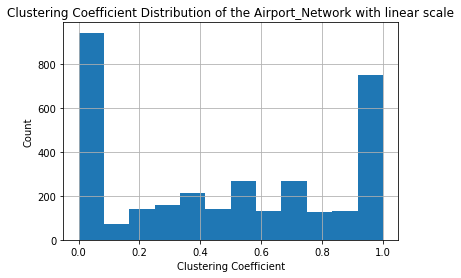

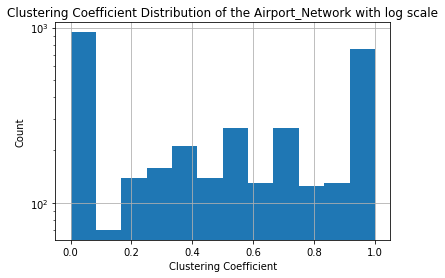

Clustering Coefficient of Airport_Network with two different technics:

Average Clustering : 0.4756552743483697

Overall Clustering Coefficient/Transitivity : 0.2481877222733011


In [22]:
Airport_Network_undirected = weighted_network_creation()
clustering_coefs = nx.clustering(Airport_Network_undirected)
nx_hist(list(clustering_coefs.values()), bins = 12, normed = False, yscale = 'linear', title = 'Clustering Coefficient Distribution of the Airport_Network with linear scale', xlabel = 'Clustering Coefficient', ylabel = 'Count')
nx_hist(list(clustering_coefs.values()), bins = 12, normed = False, yscale = 'log', title = 'Clustering Coefficient Distribution of the Airport_Network with log scale', xlabel = 'Clustering Coefficient', ylabel = 'Count')
print('Clustering Coefficient of Airport_Network with two different technics:\n\nAverage Clustering :', nx.average_clustering(Airport_Network_undirected))
# Find the overall clustering corresponding to find the transitivity of the network by using the build in networkx function
print('\nOverall Clustering Coefficient/Transitivity :', nx.transitivity(Airport_Network))

**Clustering Theory:** In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes. The networks with the largest possible average clustering coefficient are found to have a modular structure, and at the same time, they have the smallest possible average distance among the different nodes.

***Overall clustering:*** The overall clustering or the transitivity is the ratio of all existing triangles over all possible triangles. It is the fraction of “triads” (two-link with a shared node) that are “closed” by a third link. **The overall clustering of the network is 0.25 which is low.**

***Average clustering:*** The average clustering is the mean of the clustering coefficient of each node where the clustering coefficient of a node is the fraction of a node’s neighbors that are also linked. **The average clustering of the network is 0.48**

The higher the clustering coefficient of a node is, the higher the fraction of a node’s neighbors are linked to the node of interest. One of the most prominent features of social networks is that networks tend to be highly clustered. That is, your friends, are also your friend’s friends. When viewed as a network, this phenomenon presents itself as a clique or complete graph. We can simply count the frequency of cliques within a graph to estimate how prevalent they are. In fact, an higher overall clustering coefficient means that we become closer to a small world network. The more important things are that the higher the coefficient clustering is, the higher the number of the cycle in the graph is.

Two important things can already be noticed : 
   * The average clustering is 0.48 with an intermediate value when the overall clustering is low. **It means that clustering coefficient seems to be opposed: there should have a really low and really high coefficient.**
   * The existing cluster taking into account in the average clustering calculus seems to not have the same effect on the transitivity which means that **these clusters are probably not triangular but perhaps more linear.**

***Distribution:*** 
We defined the clustering coefficient of a node in a graph as the proportion of that node's neighbors that are connected and proceeded to define the clustering coefficient as the corresponding measure applied to the whole network. In some case, however, we may be interested in the distribution of the clustering coefficient over the nodes in the network. For instance, a network could have some very clustered parts, and some less clustered parts, while another network could have many nodes with a similar, average clustering coefficient. Thus, we may want to consider the distribution of the clustering coefficient. This distribution can be plotted as a cumulated plot but we did not do that.

In fact, **clustering coefficient distribution illustrate perfectly the statement said just before.** 1000 clustering coefficients are around 0, 900 coefficient are around 1, and 1500 are span between 0.1 and 0.9. It means that the network can be divided into two part: **one part of the nodes are forming perfect clusters while a second part of the nodes are doing the opposite.** All these observations can be explained with a huge subgraph containing around 2000 nodes with a low clustering coefficient combined with the existence of several small subgraphs which are perfect cluster all linked by weak ties.


***This observation makes sense with what we found before. In fact, we guess the existence of small subgraph of nodes with edges equal to 1 and one bigger subpart with a diameter of 13 nodes.***

## Centrality Measure :

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease. They should not be confused with node influence metrics, which seek to quantify the influence of every node in the network.

**Theoretical description of each measure and interpretation in our case:**

   * **Degree centrality** is defined as **the number of links incident upon a node** (i.e., the number of edges that a node has). In the case of a directed network, we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of edges that the node directs to others. When edges are associated with some positive aspects such as friendship or collaboration, indegree is often interpreted as a form of popularity, and outdegree as gregariousness. **In our case, the links are directed and they point to the airport receiving the plane in a route. Thus, the airport who have a high in-degree should be the one receiving a lot of planes and the ones having a high outer degree should be the ones who are sending a lot of planes.** In our case, as letting a plane in the ground is a huge financial loss, the in and out degree should be similar. In fact, airlines are usually organize to propose to the customer the possibility to do a round trip.


   * In a connected graph, the **closeness centrality** of a node is the average length of the shortest path between the node and all other nodes in the graph. It is the inverse of its average distance to all other nodes in the network. **Thus the more central a node is, the closer it is to all other nodes. In directed networks this only means something for Strongly Connected Components.** In fact, for directed networks, you have to distinguish between average distance from the node to all others and average distance from all nodes to the node of interest. **Closeness Centrality says a node is important when it has a short distance to get to all others, or all others have only a short distance to go to it.** So this is somewhat of a flow-based measure but doesn’t say anything about whether or not it is easy to get to the node **(i.e. It may not be “easy”, just short)**. We will do the analysis on the Strongly connected component (which is approximately the same as the entire network) and thus we can use this measure. **In our case, a node with high closeness is an airport which is connected to a lot of other airports using short distances, meaning that this airport should do a lot of connection (receiving or sending of planes or both) with a high number of different airports.**


   * **Betweenness centrality** quantifies **the number of times a node acts as a bridge along the shortest path between two other nodes.** In this conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices, have a high betweenness. While this nominally involves “distances” we can actually run it on disconnected (or only weakly connected) networks. Betweenness Centrality says a node/edge is important when it lies on the shortest path between many pairs of nodes. **In our case, a node with a high betweenness centrality would be an airport in the center of a lot of traffic indicating a lot of receiving and sending of planes.**


   * **Eigenvector centrality** is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. The main principle is the following: **the centrality of each node should be a weighted average of its neighbors' centralities. Eigenvector Centralities says a node is important when its neighbors are important, as calculated in a self-consistent manner.** In our case, **it means that airport having some traffic connexions with an important airport (like London Heathrow) in term of traffic becomes also an important airport.**


   * **PageRank** is an eigenvector centrality measure but it seeks the steady-state probability distribution for the likelihood that a walker randomly moving from node to node along links will be on anyone node at any point in time. In a directed graph trapping is prevalent, thus stochastic dead is added. In the infinite time horizon, the probability of finding a walker at any given node in this processes corresponds to its PageRank score. **PageRank says a node is important when it is likely to be randomly walked to. This is a global diffusion/flow process.** And of course, this is easy to extend to weighted networks as well, by factoring the weights into the probability of moving from one node to another. **In our case, it means that an airport with a high PageRank coefficient is part of global diffusion process meaning that this node is likely to be randomly walking.**

In [23]:
def plot_hist_centrality(centrality_measure):
    for key in centrality_measure.keys():
        tmp_value = centrality_measure[key]
        plt.figure(figsize=(10,6))
        plt.hist(list(tmp_value.values()), 100, log = True)
        plt.title(f'Distribution of the {key} of the Airport_Network in log scale')
        plt.show()

In [24]:
def ten_best_feature_per_measure(centrality_measure):
    '''
    This function allows the selection of the ten best node according to a specific centrality measure.
    ARGS :
        - centrality_measure : Dictionary containing centrality measurement for each node of the graph per type of measure. 
    RETURN :
        - ten_best_per_measure : Dictionary containing for each one of the centrality measure the 10 best nodes.
    '''
    ten_best_per_measure = dict()
    for key in centrality_measure.keys():
        # We iterate on each key of the dictionary calculated just before. Then we sort the values and we take the 10 bigger ones.
        ten_best_per_measure[key] = (sorted([(value, key) for (key, value) in centrality_measure[key].items()])[-10:])
    return ten_best_per_measure

def print_the_best(ten_best_per_measure):
    '''
    This function allows the printing of a table for each centrality measure containing the ten best airport with additional information.
    ARGS :
        - ten_best_per_measure: Dictionary containing for each one of the centrality measure the 10 best nodes.
    RETURN :
        - None object is returned, but a table for each centrality measure containing the ten best nodes with additional information.
    '''
    for key in ten_best_per_measure.keys():
        print(f'\nTOP 10 {key.upper()}:\nThe best 10 airports for the {key} are the following : \n')
        tmp = pd.DataFrame()
        # We store in a list in the rigth order the additional informations asked. 
        tmp['Country'] = [Airport_Network_weighted.node[(i[1])]['Country'] for i in ten_best_per_measure[key]] 
        tmp['City'] = [Airport_Network_weighted.node[(i[1])]['City'] for i in ten_best_per_measure[key]] 
        tmp['Longitude'] = [Airport_Network_weighted.node[(i[1])]['Longitude'] for i in ten_best_per_measure[key]] 
        tmp['Latitude'] = [Airport_Network_weighted.node[(i[1])]['Latitude'] for i in ten_best_per_measure[key]] 
        # We create a list to store the centrality measure values
        tmp[key] = [i[0] for i in ten_best_per_measure[key]]
        # We sort the dataframe to print a nice TOP 10.
        tmp = tmp.sort_values(by = key, ascending = False).reset_index(drop = True)
        tmp.index = tmp.index + 1
        display(HTML(tmp.to_html())) # This command allows a nice printing of the dataframe in a HTML format.

In [25]:
def scatter_plot_analysis(Airport_Network_weighted, centrality_measure):
    '''
    This function allows the plotting of several scatter plot to illustrate relation between variable
    ARGS : 
        - Airport_Network_weighted : Networkx graph object of interest
        - centrality_measure : Dictionary containing centrality measurement for each node of the graph per type of measure. 
    RETURN :
        - None object is returned, but plots are displayed.
    '''
    
    in_degree_scores = []
    out_degree_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of in and outer degree for each node
        in_degree_scores.append(centrality_measure['in_degree_centrality'][node])
        out_degree_scores.append(centrality_measure['out_degree_centrality'][node])
    # Creation of the scatter plot
    ScatterPlot(in_degree_scores,"In Degree Centrality ", out_degree_scores, "Out Degree Centrality ")
    
    in_degree_scores = []
    out_degree_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of in and outer degree for each node
        in_degree_scores.append(centrality_measure['in_degree_centrality_weighted'][node])
        out_degree_scores.append(centrality_measure['out_degree_centrality_weighted'][node])
    # Creation of the scatter plot
    ScatterPlot(in_degree_scores,"In Degree Centrality weighted", out_degree_scores, "Out Degree Centrality weighted")
    
    in_degree_scores_weighted = []
    in_degree_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of in and outer degree for each node
        in_degree_scores_weighted.append(centrality_measure['in_degree_centrality_weighted'][node])
        in_degree_scores.append(centrality_measure['in_degree_centrality'][node])
    # Creation of the scatter plot
    ScatterPlot(in_degree_scores_weighted,"In Degree Centrality weighted", in_degree_scores, "In Degree Centrality")
    
    out_degree_scores_weighted = []
    out_degree_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of in and outer degree for each node
        out_degree_scores_weighted.append(centrality_measure['out_degree_centrality_weighted'][node])
        out_degree_scores.append(centrality_measure['out_degree_centrality'][node])   
    # Creation of the scatter plot
    ScatterPlot(out_degree_scores_weighted,"Out Degree Centrality weighted", out_degree_scores, "Out Degree Centrality")
    
    betweeness_scores = []
    page_rank_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of interest for each node
        betweeness_scores.append(centrality_measure['betweeness_centrality'][node])
        page_rank_scores.append(centrality_measure['pagerank'][node])
    # Creation of the scatter plot
    ScatterPlot(betweeness_scores,"Betweeness Centrality", page_rank_scores, "Page Rank")
    
    betweeness_scores = []
    page_rank_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of interest for each node
        betweeness_scores.append(centrality_measure['betweeness_centrality_weighted'][node])
        page_rank_scores.append(centrality_measure['pagerank_weighted'][node])
    # Creation of the scatter plot
    ScatterPlot(betweeness_scores,"Betweeness Centrality Weighted", page_rank_scores, "Page Rank Weighted")
    
    eigenvector_scores = []
    page_rank_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of interest for each node
        eigenvector_scores.append(centrality_measure['eigenvector_centrality'][node])
        page_rank_scores.append(centrality_measure['pagerank'][node])
    # Creation of the scatter plot
    ScatterPlot(eigenvector_scores,"Eigenvector Centrality", page_rank_scores, "Page Rank")
    
    eigenvector_scores = []
    page_rank_scores = []
    for node in Airport_Network_weighted.nodes():
        # We just put in a list the values of interest for each node
        eigenvector_scores.append(centrality_measure['eigenvector_centrality_weighted'][node])
        page_rank_scores.append(centrality_measure['pagerank_weighted'][node])
    # Creation of the scatter plot
    ScatterPlot(eigenvector_scores,"Eigenvector Centrality Weighted", page_rank_scores, "Page Rank Weighted")

In [26]:
# To calculate in_degree_centrality using Weight as weight, we need to have the total sum of the Weight.
tot_weight = 0
for i in Airport_Network_weighted.nodes():
    for j in Airport_Network_weighted.adj[i]:
        tot_weight += Airport_Network_weighted.adj[i][j]['Weight']

# Explanation about this way of finding the in and out degree centrality using "Weight" as the weight is descreibed below
df_in_degree_weighted = dict(Airport_Network_weighted.in_degree(weight = 'Weight'))
for i in df_in_degree_weighted.keys():
    df_in_degree_weighted[i] =  df_in_degree_weighted[i]/ tot_weight
    
df_out_degree_weighted = dict(Airport_Network_weighted.out_degree(weight = 'Weight'))
for i in df_out_degree_weighted.keys():
    df_out_degree_weighted[i] =  df_out_degree_weighted[i]/ tot_weight

**An explanation about the calculus of the in and out degree centrality using "Weight" as the weight is needed.** In fact, this weighted in and out degree centrality measure is the only statistic without any build in function made to find it. Thus, the process is a little bit more complicated. 

By definition, the degree centrality makes the assumption that the most connected nodes are the most
important. Degree centrality just says a node is important when many others are attached to it. **So a node’s degree, is also its degree centrality score.** You thus use this fact to calculate the weighted version. In/Out degree can, of course, be distinguished.

For the in and out degree centrality calculation, we use the networkx function in_degree_centrality (and out_degree_centrality). We found out that **this measure returned the degree of node divided by the total number of node in the graph.** It gives a kind of relative importance measure between 0 and 1 which make sense by definition of the degree centrality.

Thus, we did the same for the weighted version. Indeed, we calculate the sum of all Weight elements present in the graph. **Then, we use the in_degree (and out_degree) build in function, with the weight parameter set up to, find weighted in/out degree per node and finally we divide each one of this values by the sum of all Weight elements to find our in and out degree centrality using "Weight" as the weight.**

In [27]:
# We store all the centrality measure in a dictionary
centrality_measure = dict()
centrality_measure = {'in_degree_centrality': nx.in_degree_centrality(Airport_Network), 
                      'out_degree_centrality': nx.out_degree_centrality(Airport_Network),
                      'in_degree_centrality_weighted': df_in_degree_weighted, 
                      'out_degree_centrality_weighted': df_out_degree_weighted,
                      'closeness_centrality': nx.closeness_centrality(max(nx.strongly_connected_component_subgraphs(Airport_Network), key=len)),
                      'betweeness_centrality': nx.betweenness_centrality(Airport_Network),
                      'betweeness_centrality_weighted': nx.betweenness_centrality(Airport_Network_weighted, weight= 'Weight'),
                      'pagerank': nx.pagerank(Airport_Network),
                      'pagerank_weighted': nx.pagerank(Airport_Network_weighted, weight= 'Weight'),
                      'eigenvector_centrality': nx.eigenvector_centrality(Airport_Network),
                      'eigenvector_centrality_weighted': nx.eigenvector_centrality(Airport_Network_weighted, weight= 'Weight'),
                     }

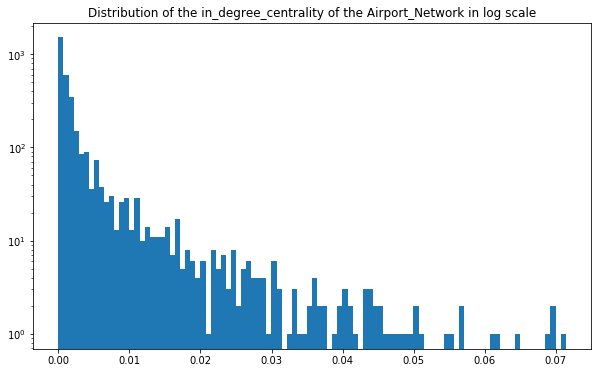

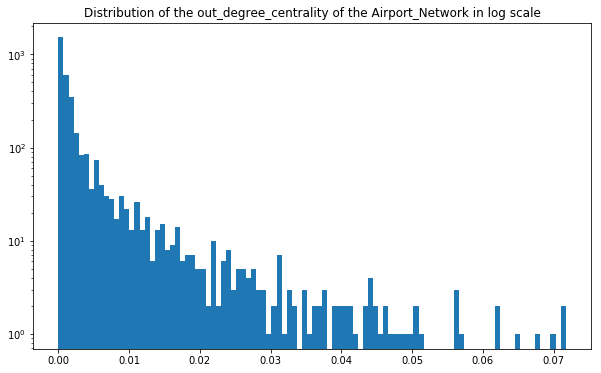

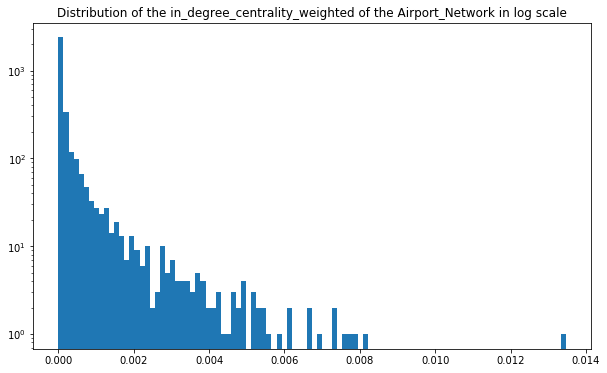

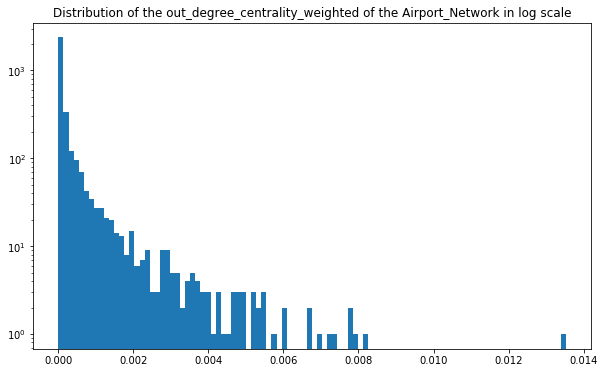

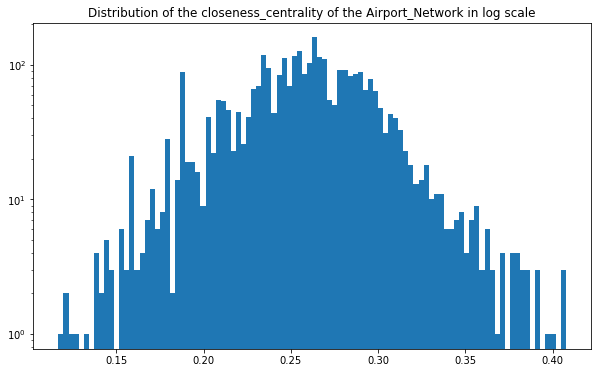

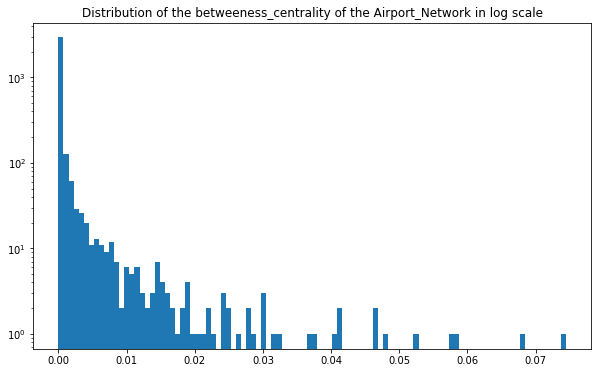

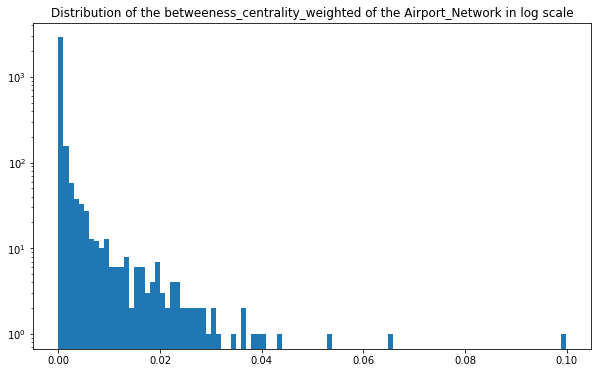

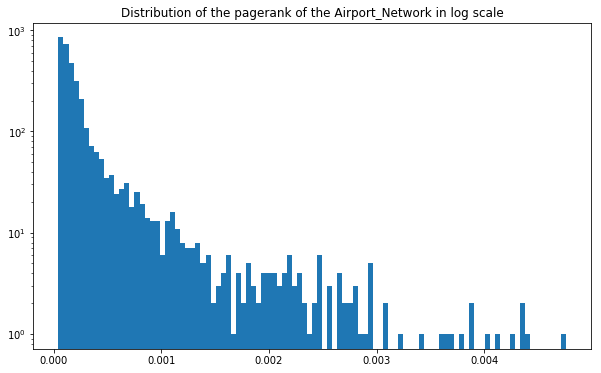

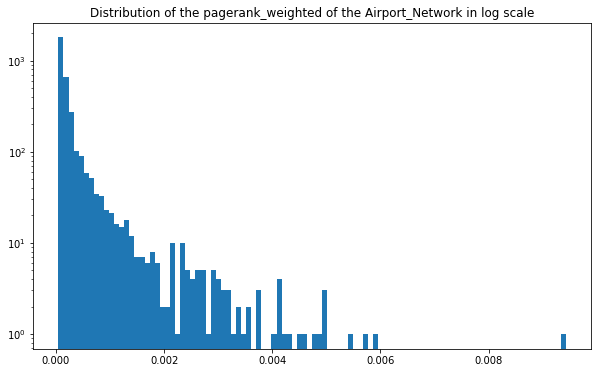

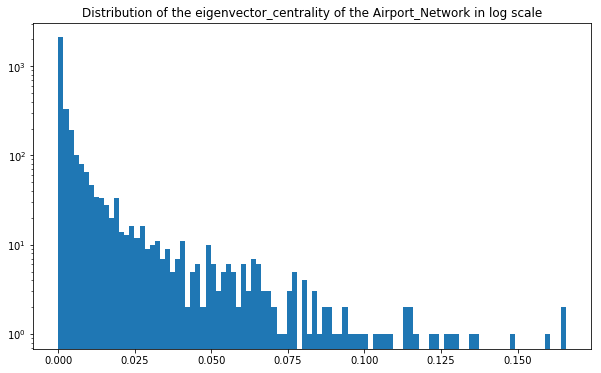

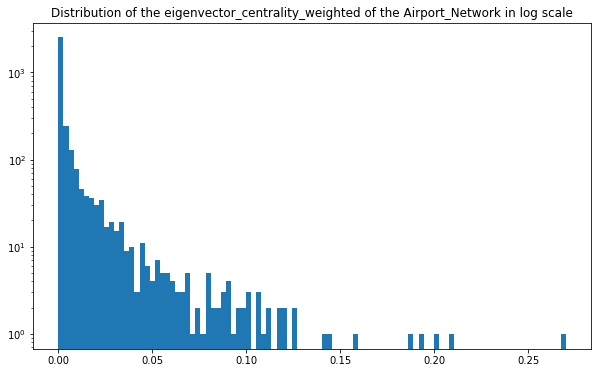

In [28]:
plot_hist_centrality(centrality_measure)

**In and Out degree distribution:** As we expected, the distribution of in-degree and out-degree are similar. You can have more details on the analysis of these distributions above in the previous section.

**In and Out Weighted degree distribution:** As we expected, again the distribution of in and out degree are similar. Moreover, comparing with the unweighted versions, we can conclude again that the distribution is similar. The only difference is the apparition of some extreme values representing the biggest airport Hubs.

**Closeness centrality distribution:** This distribution seems to be a Gaussian centered in 0.25 with a width of 0.1. By plotting the entire graph, a peak at 0 can also be seen. The distribution seems to show us that a huge number of nodes are present in a huge subgraph. This subgraph would correspond to the Gaussian distribution. Then, it would also show that a portion of the nodes have closeness near 0 meaning that these nodes are isolated from the other. It could be some disconnected part of the entire network.

**Betweenness Centrality distribution:** This distribution seems similar to the in and out degree distribution with a little bit less of data on the right tail. Moreover, the weighted version does not really change the distribution. This absence of change would mean that, even without weights (which means without counts of the duplicity of edges), airports in the middle of the traffic would stay with lot more planes than the other relative to the entire number of weights.

**PageRank and Eigenvector distribution:** The shape of the distribution are nearly the same and extremely similar to the one of in and out degrees. In addition, the effect of the weights is the same: the weights allows the apparition of some more extreme values representing the biggest airport hubs indicating a bigger differentiation between others.

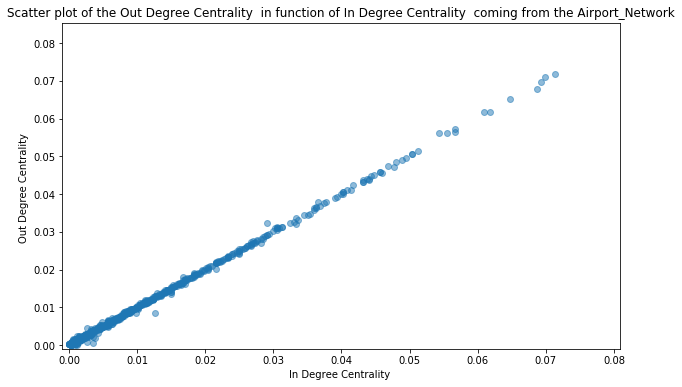

The Pearson Correlation coefficient (linear) for these two variable is 0.9995727330394657
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9863378191271248


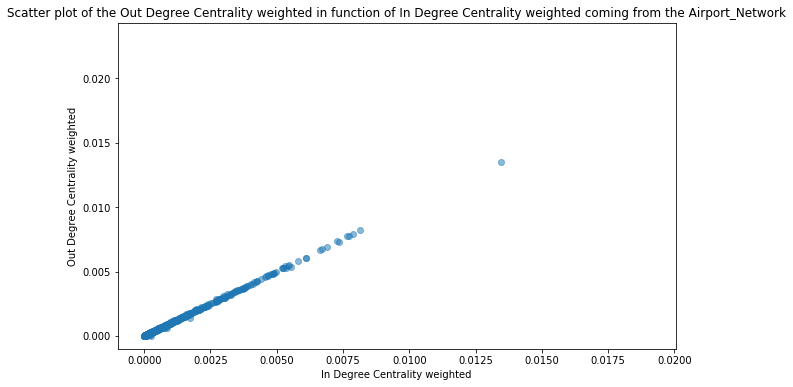

The Pearson Correlation coefficient (linear) for these two variable is 0.9997718355491718
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9910713323293314


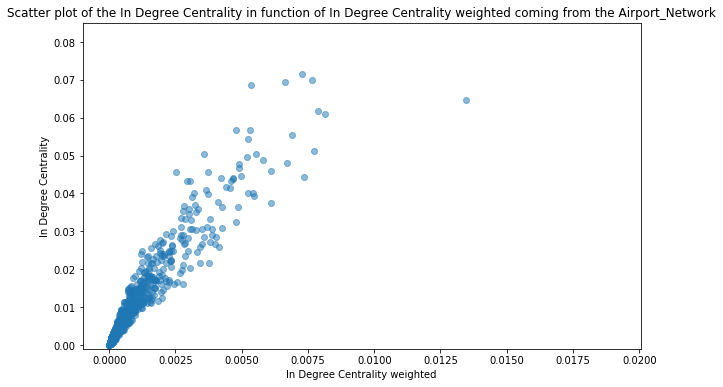

The Pearson Correlation coefficient (linear) for these two variable is 0.9557935918733966
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9637117471722522


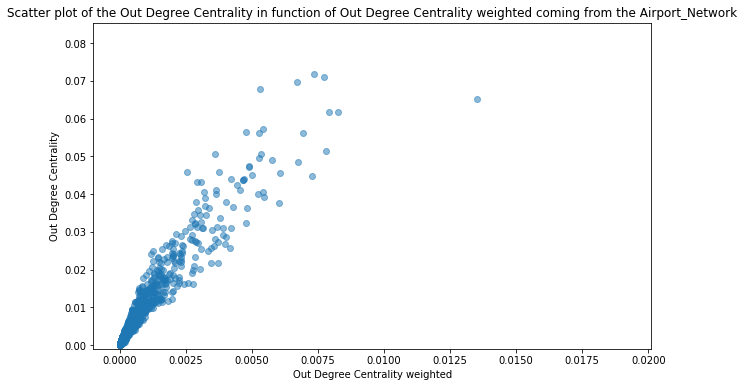

The Pearson Correlation coefficient (linear) for these two variable is 0.9562382688903392
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9633611428377887


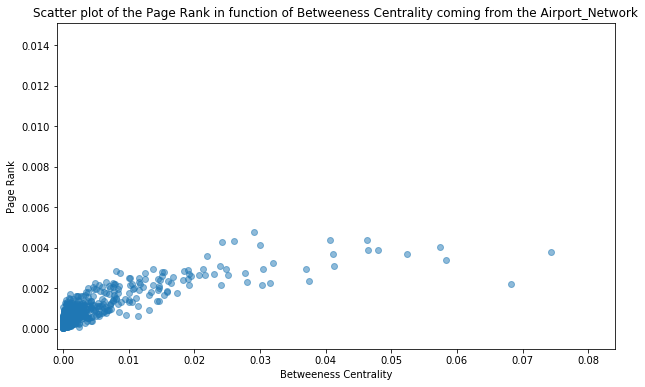

The Pearson Correlation coefficient (linear) for these two variable is 0.8142796657408237
The Spearman Correlation coefficient (monotonic) for these two variable is 0.7949034968501444


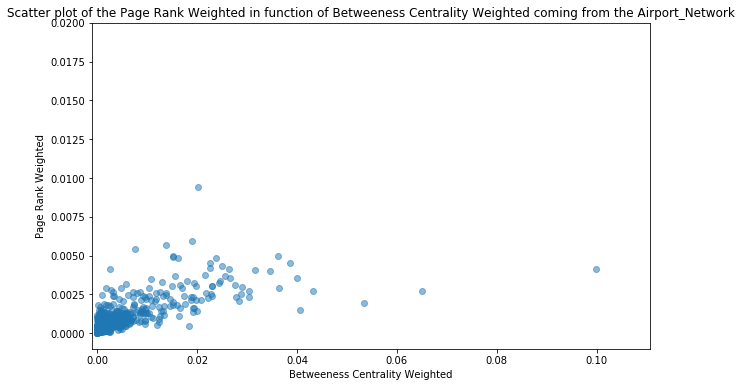

The Pearson Correlation coefficient (linear) for these two variable is 0.755170052971848
The Spearman Correlation coefficient (monotonic) for these two variable is 0.7498293564557909


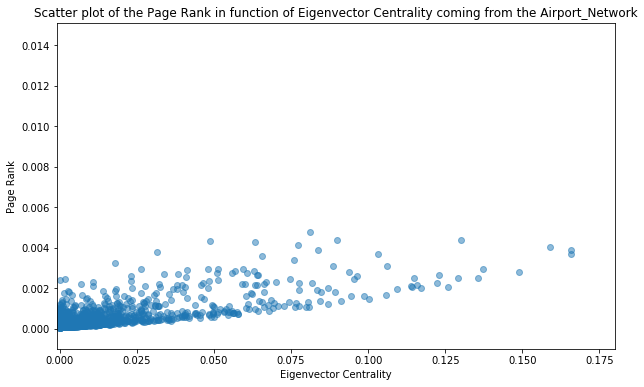

The Pearson Correlation coefficient (linear) for these two variable is 0.7836083627577144
The Spearman Correlation coefficient (monotonic) for these two variable is 0.4002943677866924


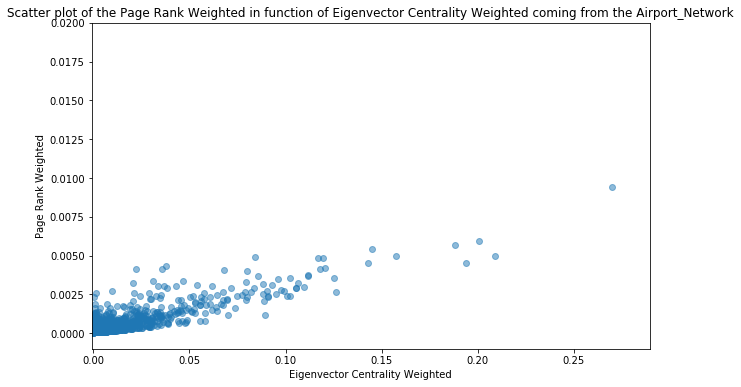

The Pearson Correlation coefficient (linear) for these two variable is 0.8822276010382437
The Spearman Correlation coefficient (monotonic) for these two variable is 0.4116429568194253


In [29]:
from utils import ScatterPlot
scatter_plot_analysis(Airport_Network_weighted, centrality_measure)

**In and Out degree scatter:** As we expected, the distribution of in-degree and out-degree are similar and thus correlated with coefficient near to 1. This means that a plane that takes off in an airport do not stays on the ground but go to another airport and so on. This observation makes sense of reality.

**In and Out Weighted degree scatter:** The same observation for in and out degree distribution stands also for this case. Moreover, this scatter is a nice illustration of the effect of the weights: an apparition of some extreme values representing the biggest airport Hubs. 

**In and In Weighted degree scatter:** In this scatter plot, the effect of weights can be visualized. In fact, thanks to the trend we can conclude that weights increase the degree which makes sense as by definition, it can't be decreased. Moreover, the majority of weights have a small impact on the smaller degree as the majority of the points are linearly correlated on the bottom left part of the scatter. In fact, the linear correlation coefficient is around 0.95. A more important effect of weights is more observable on high degree node.

**Out and Out Weighted degree scatter:** As we have proved that in and out degree distribution are similar, the observations made for the in and in weighted degree distribution stands for this category.

**Betweenness Centrality and Page Rank scatter:** These two variable are linearly correlated with a coefficient around 0.8. This makes sense by taking into account the definition of each measure. 

**Weighted Betweenness Centrality and Weighted Page Rank scatter:** Again, weights have no real impact. It differentiates a little bit more the node by creating more extreme values but this process stays not too important. The correlation coefficient decrease from 0.8 (unweighted) to 0.76(weighted).

**PageRank and Eigenvector scatter:** These two variables are linearly correlated with a coefficient around 0.8. This makes sense by taking into account the definition of each measure. 

**Weighted PageRank and Weighted Eigenvector scatter:** Here, the impact of the weights are more visible. In fact, taking into account the weights increase the correlation coefficient to 0.88 and create 5 more extreme values (the right part of the scatter). 

In [30]:
print_the_best(ten_best_feature_per_measure(centrality_measure))


TOP 10 IN_DEGREE_CENTRALITY:
The best 10 airports for the in_degree_centrality are the following : 



,Country,City,Longitude,Latitude,in_degree_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.071407
2,France,Paris,2.550000,49.012798,0.069907
3,Netherlands,Amsterdam,4.763890,52.308601,0.069307
4,Turkey,Istanbul,28.814600,40.976898,0.068707
5,United States,Atlanta,-84.428101,33.636700,0.064806
6,China,Beijing,116.584999,40.080101,0.061806
7,United States,Chicago,-87.904800,41.978600,0.060906
8,Germany,Munich,11.786100,48.353802,0.056706
9,Russia,Moscow,37.906300,55.408798,0.056706
10,United States,Dallas-Fort Worth,-97.038002,32.896801,0.055506



TOP 10 OUT_DEGREE_CENTRALITY:
The best 10 airports for the out_degree_centrality are the following : 



,Country,City,Longitude,Latitude,out_degree_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.071707
2,France,Paris,2.550000,49.012798,0.071107
3,Netherlands,Amsterdam,4.763890,52.308601,0.069607
4,Turkey,Istanbul,28.814600,40.976898,0.067807
5,United States,Atlanta,-84.428101,33.636700,0.065107
6,China,Beijing,116.584999,40.080101,0.061806
7,United States,Chicago,-87.904800,41.978600,0.061806
8,Germany,Munich,11.786100,48.353802,0.057306
9,Russia,Moscow,37.906300,55.408798,0.056406
10,United States,Dallas-Fort Worth,-97.038002,32.896801,0.056106



TOP 10 IN_DEGREE_CENTRALITY_WEIGHTED:
The best 10 airports for the in_degree_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,in_degree_centrality_weighted
1,United States,Atlanta,-84.428101,33.636700,0.013464
2,United States,Chicago,-87.904800,41.978600,0.008129
3,China,Beijing,116.584999,40.080101,0.007892
4,United Kingdom,London,-0.461941,51.470600,0.007744
5,France,Paris,2.550000,49.012798,0.007641
6,United States,Los Angeles,-118.407997,33.942501,0.007360
7,Germany,Frankfurt,8.570556,50.033333,0.007286
8,United States,Dallas-Fort Worth,-97.038002,32.896801,0.006902
9,United States,New York,-73.778900,40.639801,0.006725
10,Netherlands,Amsterdam,4.763890,52.308601,0.006651



TOP 10 OUT_DEGREE_CENTRALITY_WEIGHTED:
The best 10 airports for the out_degree_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,out_degree_centrality_weighted
1,United States,Atlanta,-84.428101,33.636700,0.013523
2,United States,Chicago,-87.904800,41.978600,0.008247
3,China,Beijing,116.584999,40.080101,0.007907
4,United Kingdom,London,-0.461941,51.470600,0.007789
5,France,Paris,2.550000,49.012798,0.007744
6,Germany,Frankfurt,8.570556,50.033333,0.007345
7,United States,Los Angeles,-118.407997,33.942501,0.007271
8,United States,Dallas-Fort Worth,-97.038002,32.896801,0.006931
9,United States,New York,-73.778900,40.639801,0.006739
10,Netherlands,Amsterdam,4.763890,52.308601,0.006695



TOP 10 CLOSENESS_CENTRALITY:
The best 10 airports for the closeness_centrality are the following : 



,Country,City,Longitude,Latitude,closeness_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.407509
2,United Kingdom,London,-0.461941,51.470600,0.406799
3,France,Paris,2.550000,49.012798,0.404833
4,United Arab Emirates,Dubai,55.364399,25.252800,0.401105
5,Netherlands,Amsterdam,4.763890,52.308601,0.397639
6,United States,Los Angeles,-118.407997,33.942501,0.392385
7,Turkey,Istanbul,28.814600,40.976898,0.390836
8,United States,New York,-73.778900,40.639801,0.390836
9,Canada,Toronto,-79.630600,43.677200,0.385532
10,NaN,NaN,NaN,NaN,0.384942



TOP 10 BETWEENESS_CENTRALITY:
The best 10 airports for the betweeness_centrality are the following : 



,Country,City,Longitude,Latitude,betweeness_centrality
1,NaN,NaN,NaN,NaN,0.074417
2,United States,Anchorage,-149.996002,61.174400,0.068213
3,United States,Los Angeles,-118.407997,33.942501,0.058308
4,France,Paris,2.550000,49.012798,0.057428
5,United Arab Emirates,Dubai,55.364399,25.252800,0.052321
6,Germany,Frankfurt,8.570556,50.033333,0.047902
7,China,Beijing,116.584999,40.080101,0.046426
8,United States,Chicago,-87.904800,41.978600,0.046224
9,Canada,Toronto,-79.630600,43.677200,0.041243
10,Netherlands,Amsterdam,4.763890,52.308601,0.041080



TOP 10 BETWEENESS_CENTRALITY_WEIGHTED:
The best 10 airports for the betweeness_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,betweeness_centrality_weighted
1,NaN,NaN,NaN,NaN,0.099818
2,United States,Anchorage,-149.996002,61.174400,0.065079
3,NaN,NaN,NaN,NaN,0.053360
4,United States,Houston,-95.341400,29.984400,0.043244
5,United States,Honolulu,-157.924228,21.320620,0.040709
6,Canada,Toronto,-79.630600,43.677200,0.039922
7,Germany,Frankfurt,8.570556,50.033333,0.038592
8,China,Guangzhou,113.299004,23.392401,0.036480
9,France,Paris,2.550000,49.012798,0.036233
10,United Arab Emirates,Dubai,55.364399,25.252800,0.034575



TOP 10 PAGERANK:
The best 10 airports for the pagerank are the following : 



,Country,City,Longitude,Latitude,pagerank
1,United States,Atlanta,-84.428101,33.636700,0.004754
2,Turkey,Istanbul,28.814600,40.976898,0.004397
3,United States,Chicago,-87.904800,41.978600,0.004359
4,United States,Denver,-104.672997,39.861698,0.004341
5,United States,Dallas-Fort Worth,-97.038002,32.896801,0.004260
6,Russia,Moscow,37.906300,55.408798,0.004131
7,France,Paris,2.550000,49.012798,0.004006
8,Germany,Frankfurt,8.570556,50.033333,0.003896
9,China,Beijing,116.584999,40.080101,0.003867
10,NaN,NaN,NaN,NaN,0.003804



TOP 10 PAGERANK_WEIGHTED:
The best 10 airports for the pagerank_weighted are the following : 



,Country,City,Longitude,Latitude,pagerank_weighted
1,United States,Atlanta,-84.428101,33.636700,0.009427
2,United States,Chicago,-87.904800,41.978600,0.005938
3,United States,Los Angeles,-118.407997,33.942501,0.005718
4,United States,Dallas-Fort Worth,-97.038002,32.896801,0.005450
5,United Kingdom,London,-0.461941,51.470600,0.005007
6,France,Paris,2.550000,49.012798,0.004982
7,Singapore,Singapore,103.994003,1.350190,0.004945
8,United States,Denver,-104.672997,39.861698,0.004831
9,China,Beijing,116.584999,40.080101,0.004820
10,Germany,Frankfurt,8.570556,50.033333,0.004559



TOP 10 EIGENVECTOR_CENTRALITY:
The best 10 airports for the eigenvector_centrality are the following : 



,Country,City,Longitude,Latitude,eigenvector_centrality
1,Netherlands,Amsterdam,4.763890,52.308601,0.165730
2,Germany,Frankfurt,8.570556,50.033333,0.165633
3,France,Paris,2.550000,49.012798,0.159111
4,Germany,Munich,11.786100,48.353802,0.148781
5,United Kingdom,London,-0.461941,51.470600,0.137271
6,Italy,Rome,12.238889,41.800278,0.135745
7,Turkey,Istanbul,28.814600,40.976898,0.130042
8,Spain,Barcelona,2.078460,41.297100,0.129222
9,Switzerland,Zurich,8.549170,47.464699,0.126035
10,Spain,Madrid,-3.562640,40.471926,0.123097



TOP 10 EIGENVECTOR_CENTRALITY_WEIGHTED:
The best 10 airports for the eigenvector_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,eigenvector_centrality_weighted
1,United States,Atlanta,-84.428101,33.636700,0.270035
2,United Kingdom,London,-0.461941,51.470600,0.208803
3,United States,Chicago,-87.904800,41.978600,0.200477
4,United States,New York,-73.778900,40.639801,0.193983
5,United States,Los Angeles,-118.407997,33.942501,0.188399
6,France,Paris,2.550000,49.012798,0.157712
7,United States,Dallas-Fort Worth,-97.038002,32.896801,0.145131
8,Germany,Frankfurt,8.570556,50.033333,0.142985
9,United States,San Francisco,-122.375000,37.618999,0.126156
10,Canada,Toronto,-79.630600,43.677200,0.125107


   * **In degree centrality:** The links are directed and they point to the airport receiving the plane in a transaction. Thus, the airport who have a high in degree should be the one receiving a lot. **This measure does not take into account the number of duplicates routes but more the frequency.** **The presence of these airports makes sense as they are situated at strategic places in the world and known for their huge importance.**
   
   
   * **Out degree centrality:** The links are directed and they point to the airport receiving the plane in a route and **the ones having a high outer degree are the ones who are sending a lot of plane to another part of the world.** Again our Top10 **make sense as we have a collection of several strategic countries allowing to reach several parts of the earth.** The Top10 is nearly the same as the one for the in degree with cities coming from Germany, France, US, China ...  
   
   
   * **In degree centrality weighted with 'Weight':** In this case, **thanks to the weights which represent the number of duplicates routes, the Top10 should be the airport having the higher number of routes.** Just as a reminder: each node is an airport, and a directed edge represents one flight by one airline. A flight/route in this dataset is defined as a normally regularly occurring flight identified by its flight number (e.g., AF331), not individual flights (e.g., AF331 on June 14, 2015). Thus, our Top10 should not be composed of nodes with the highest number of planes going in and out but should **be composed of the best airports in term of number flights diversity.** Our Top10 is indeed composed of airports from United States mainly with China and France. It makes sense that American airport has a huge place in this ranking as US is the one of the more visited continent and active in term of transport by place. 
   

   * **Out degree centrality weighted with 'TotalValue':** We should be in a quite similar situation as, by definition, the out-degree is similar to the in degree distribution due to the fact that airlines were constructed to allows the customer a round trip. In fact, the Top10 is nearly the same as the one for the In degree. The observation made before stands. The only difference is that now the airports are more sending planes to another destination.
 
 
   * **Closeness centrality:** In our case, a node with high closeness is an airport which **is connected to a lot of other airports using short distances, meaning that this airport should do a lot of traffic (receiving or sending of planes or both) with a high number of different airports.** Our Top10 is composed of airports found in the in and out degree Top10 which make sense as closeness measure is directly impacted by the degree. Again, as we are not using a weighted version of the closeness we are more looking at the diversity of routes not taking into account duplicates due to airlines.


   * **Betweenness centrality:** In our case, a node with a high betweenness centrality **would be an airport in the center of a lot of traffic indicating a lot of sending and receiving.** Thus, **it should be similar but not the same (as the calculation are made with another method) to Closeness table and again, as we are not using a weighted version, we are more looking at the diversity of routes more than frequency and thus small countries could be included.** By looking at the output table, this measure makes sense. Unfortunately, a Nan value is at the first place of the Top10 : this node corresponds to missing data about the airport informations.
   

   * **Betweenness centrality using "Weight" as the weight:** In this case, **we should found airports having a high diversity of routes with a high diversity of airlines company. This makes the guessing of which airport should be in the Top10 quite impossible.** In fact, this Top10 is made of some nodes present in the previous top10 but also with nodes which were not expected.
   
   * **PageRank:** In our case, **PageRank measure means that an airport with a high PageRank coefficient is part of global diffusion process meaning that this node is likely to be randomly walked.** Thus, we should find again the same collection of airports in the previous Top10 without taking into account weights. This is the case.
   
   * **PageRank using "Weight" as the weight:**  As we are taking the **"Weight" feature (which is just the number of different airlines doing the same routes between two airports) as weights**, we should have a Top10 of some random airports and some previously seen airports as we are taking into account the diversity of the routes and of the airlines proposing these routes. This is the case.
   
   * **Eigenvector centrality with and without using "Weight" as the weight:** In our case, **this measure means that airports having some links with important airports (like Atlanta) become also an important airport.** Thus, we should have similar results as the ones found for degree centrality analysis. This is the case.
   
   
***To conclude this part, in the several Top10 we have seen the importance of Americans and European airports. Moreover, some airports are present in the majority of top10 (line Atlanta) showing their huge importance in the entire network.***

## Reversed graph analysis

**The hypothesis about the reversed graph is that the results should be similar. Similar means that all distribution should have the same shape, the scatter should have the same trend with approximately the same correlation coefficient and the Top10 should be approximately composed of the same airports. We will see if it's the case.**

Before the reversing direction, the links point to the airport receiving the plane in a route. Thus, the edges represented the 'planes flow' in the original network. Now the links are directed from the airport that receives the plane to the airport that sends the plane. 

In the original network, the results of centrality analysis gave insight to the airports that were receiving a plane. Now, it will give more insights into airports sending planes. As we said before, as we find out that the in and out degree distribution are the same due to the structure of airlines, there should not have an important difference in the analysis.

Name: 
Type: DiGraph
Number of nodes: 3334
Number of edges: 37505
Average in degree:  11.2493
Average out degree:  11.2493


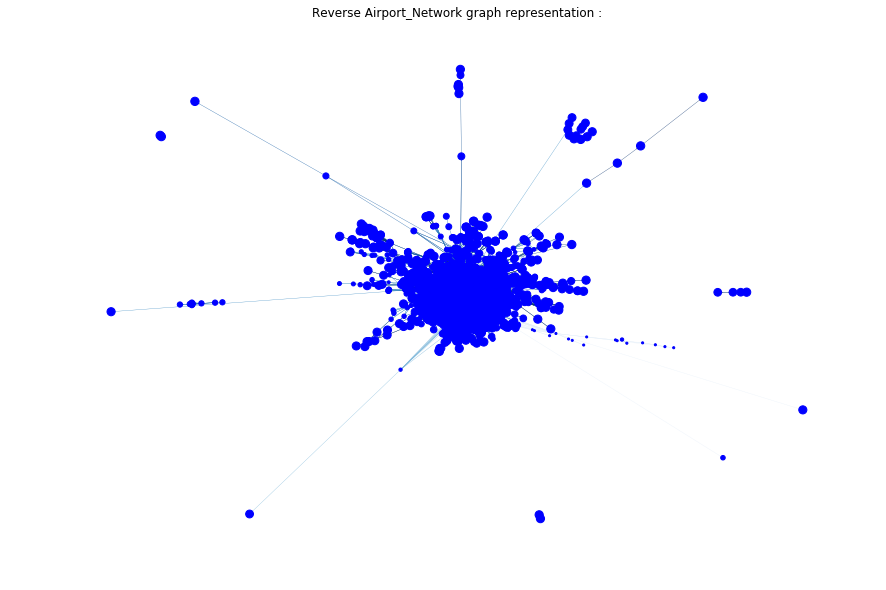

In [31]:
Reversed_Airport_Network = Airport_Network_weighted.reverse(copy=True)
# We see that information printed are the same as the not reversed version : it makes sense
print(nx.info(Reversed_Airport_Network))
# Plot the graph
plt_directed(Reversed_Airport_Network, 'Reverse Airport_Network graph representation :')

In [32]:
# To calculate in_degree_centrality using TotalValue as weight, we need to have the total sum of the TotalValues.
Reversed_tot_weight = 0
for i in Reversed_Airport_Network.nodes():
    for j in Reversed_Airport_Network.adj[i]:
        Reversed_tot_weight += Reversed_Airport_Network.adj[i][j]['Weight']

# Explanation about this way of finding the in and out degree centrality using "TotalValue" as the weight is descreibed below
Reversed_df_in_degree_weighted = dict(Reversed_Airport_Network.in_degree(weight = 'Weight'))
for i in Reversed_df_in_degree_weighted.keys():
    Reversed_df_in_degree_weighted[i] =  Reversed_df_in_degree_weighted[i]/Reversed_tot_weight
    
Reversed_df_out_degree_weighted = dict(Reversed_Airport_Network.out_degree(weight = 'Weight'))
for i in Reversed_df_out_degree_weighted.keys():
    Reversed_df_out_degree_weighted[i] =  Reversed_df_out_degree_weighted[i]/Reversed_tot_weight

In [33]:
# We store all the centrality measure in a dictionary
centrality_measure_reverse = dict()
centrality_measure_reverse = {'in_degree_centrality': nx.in_degree_centrality(Reversed_Airport_Network), 
                              'out_degree_centrality': nx.out_degree_centrality(Reversed_Airport_Network),
                              'in_degree_centrality_weighted': Reversed_df_out_degree_weighted, 
                              'out_degree_centrality_weighted': Reversed_df_out_degree_weighted,
                              'closeness_centrality': nx.closeness_centrality(max(nx.strongly_connected_component_subgraphs(Reversed_Airport_Network), key=len)),
                              'betweeness_centrality': nx.betweenness_centrality(Reversed_Airport_Network),
                              'betweeness_centrality_weighted': nx.betweenness_centrality(Reversed_Airport_Network, weight= 'Weight'),
                              'pagerank': nx.pagerank(Reversed_Airport_Network),
                              'pagerank_weighted': nx.pagerank(Reversed_Airport_Network, weight= 'Weight'),
                              'eigenvector_centrality': nx.eigenvector_centrality(Reversed_Airport_Network),
                              'eigenvector_centrality_weighted': nx.eigenvector_centrality(Reversed_Airport_Network, weight= 'Weight'),
                             }

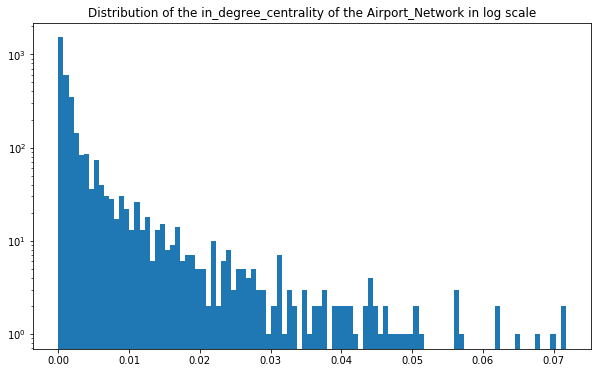

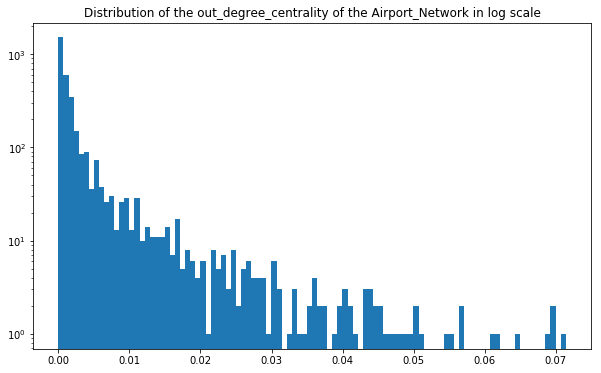

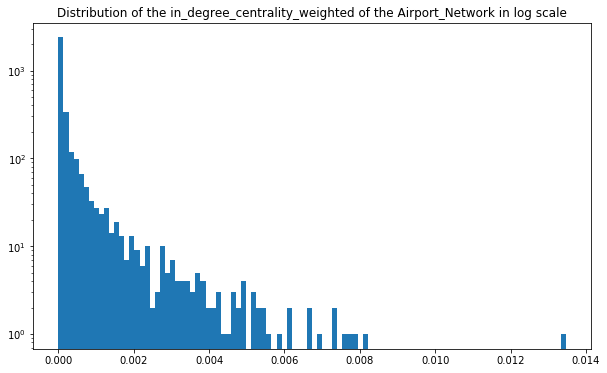

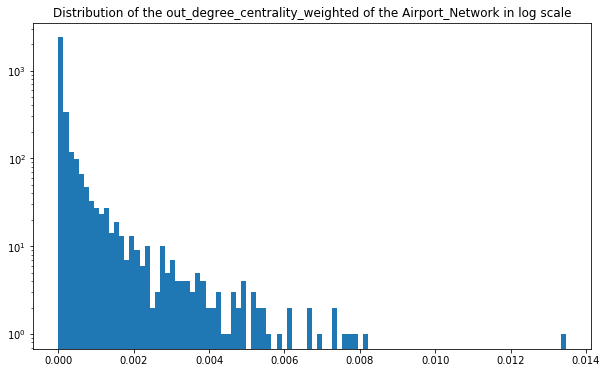

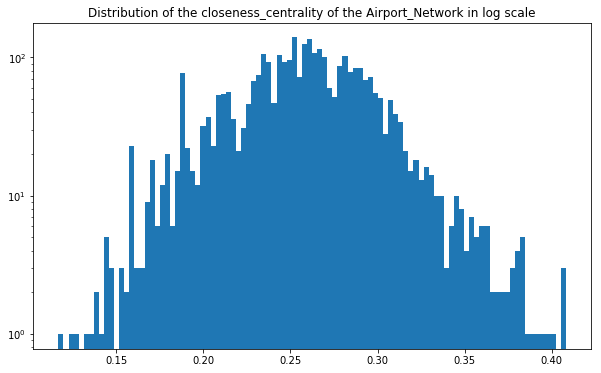

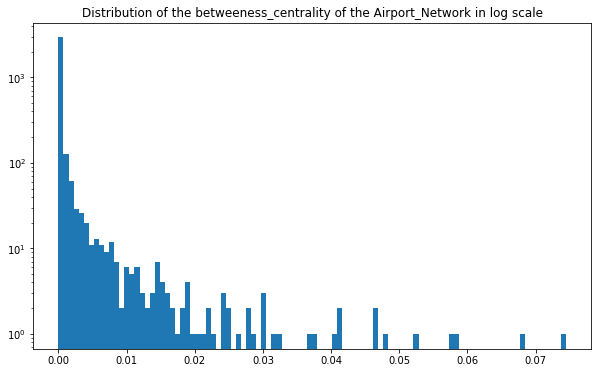

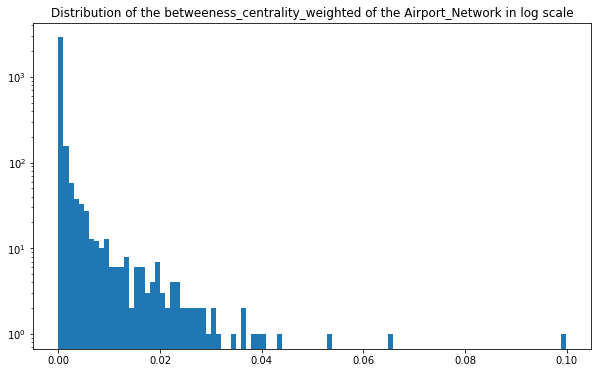

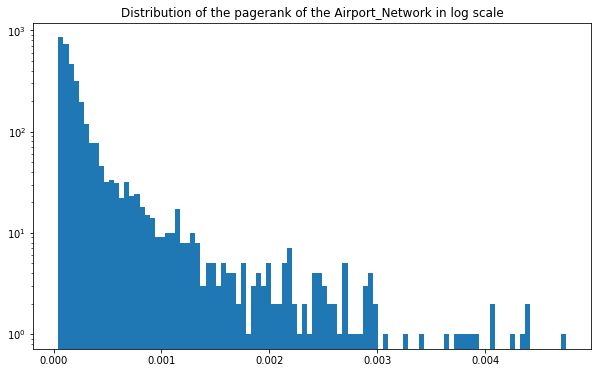

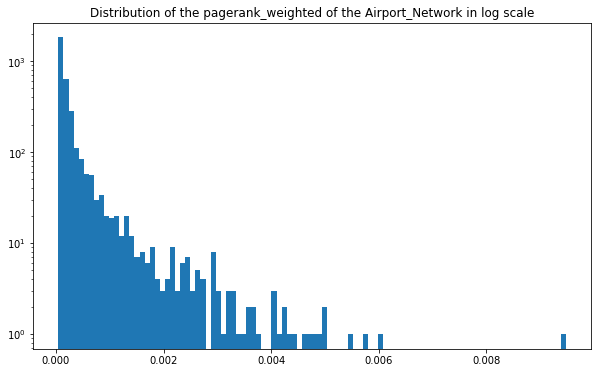

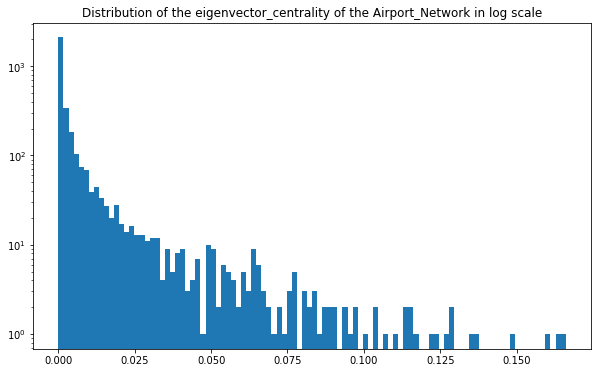

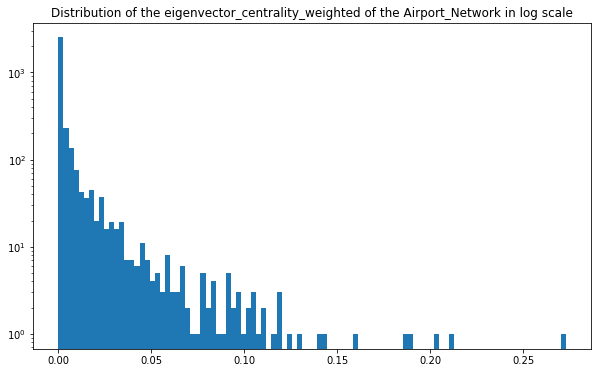

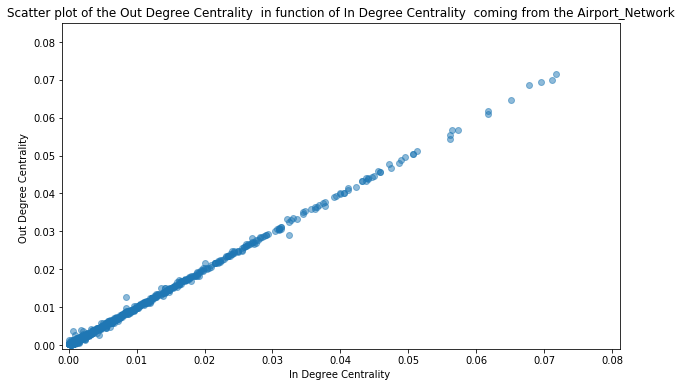

The Pearson Correlation coefficient (linear) for these two variable is 0.9995727330394657
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9863378191271248


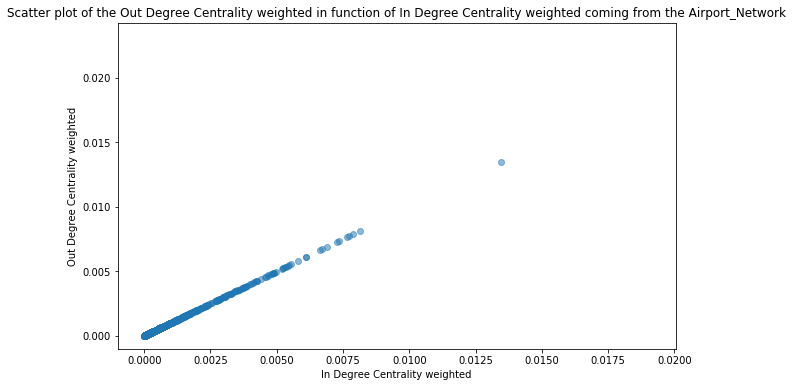

The Pearson Correlation coefficient (linear) for these two variable is 1.0
The Spearman Correlation coefficient (monotonic) for these two variable is 1.0


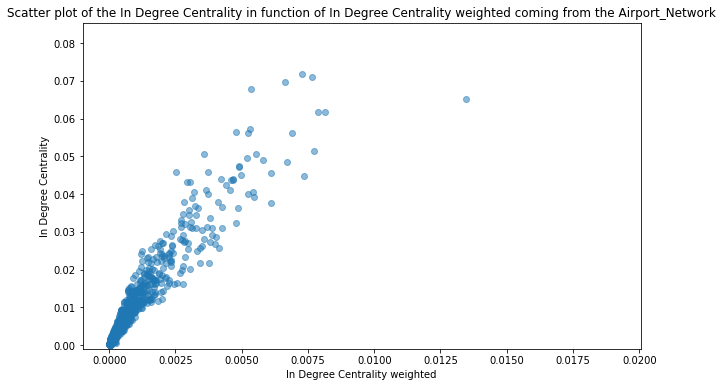

The Pearson Correlation coefficient (linear) for these two variable is 0.9558585027991363
The Spearman Correlation coefficient (monotonic) for these two variable is 0.954180547280039


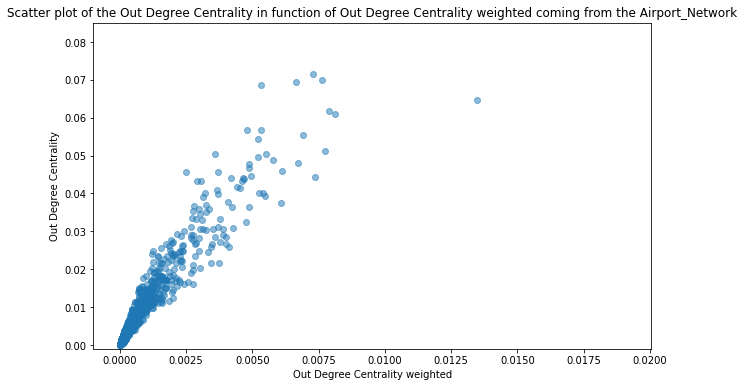

The Pearson Correlation coefficient (linear) for these two variable is 0.9557935918733966
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9637117471722522


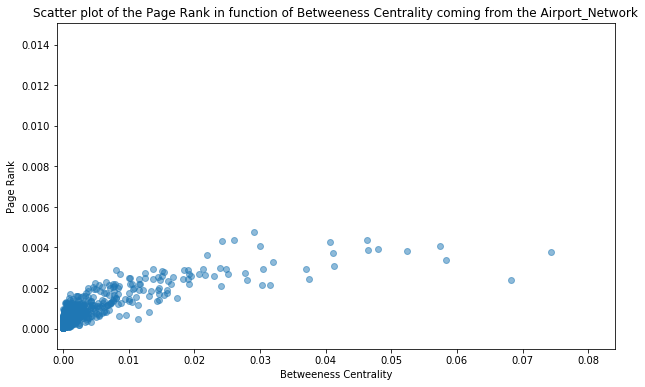

The Pearson Correlation coefficient (linear) for these two variable is 0.8163632491011379
The Spearman Correlation coefficient (monotonic) for these two variable is 0.7979362645229917


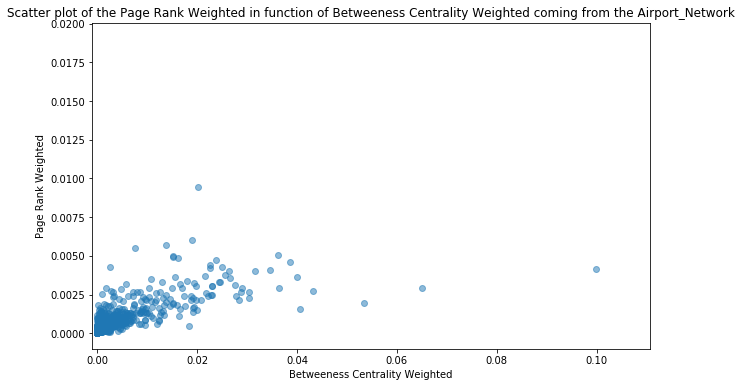

The Pearson Correlation coefficient (linear) for these two variable is 0.7567467813881712
The Spearman Correlation coefficient (monotonic) for these two variable is 0.7480892921686363


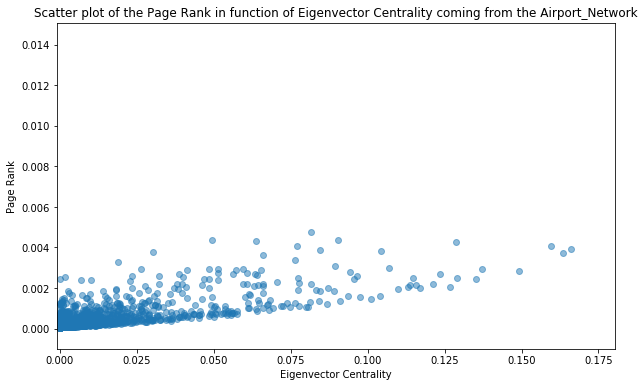

The Pearson Correlation coefficient (linear) for these two variable is 0.7824139259748296
The Spearman Correlation coefficient (monotonic) for these two variable is 0.39497771088537337


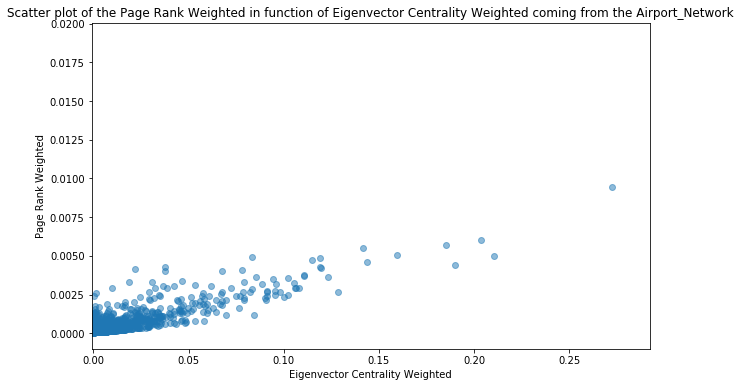

The Pearson Correlation coefficient (linear) for these two variable is 0.8818187445946081
The Spearman Correlation coefficient (monotonic) for these two variable is 0.4096849086022556

TOP 10 IN_DEGREE_CENTRALITY:
The best 10 airports for the in_degree_centrality are the following : 



,Country,City,Longitude,Latitude,in_degree_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.071707
2,France,Paris,2.550000,49.012798,0.071107
3,Netherlands,Amsterdam,4.763890,52.308601,0.069607
4,Turkey,Istanbul,28.814600,40.976898,0.067807
5,United States,Atlanta,-84.428101,33.636700,0.065107
6,China,Beijing,116.584999,40.080101,0.061806
7,United States,Chicago,-87.904800,41.978600,0.061806
8,Germany,Munich,11.786100,48.353802,0.057306
9,Russia,Moscow,37.906300,55.408798,0.056406
10,United States,Dallas-Fort Worth,-97.038002,32.896801,0.056106



TOP 10 OUT_DEGREE_CENTRALITY:
The best 10 airports for the out_degree_centrality are the following : 



,Country,City,Longitude,Latitude,out_degree_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.071407
2,France,Paris,2.550000,49.012798,0.069907
3,Netherlands,Amsterdam,4.763890,52.308601,0.069307
4,Turkey,Istanbul,28.814600,40.976898,0.068707
5,United States,Atlanta,-84.428101,33.636700,0.064806
6,China,Beijing,116.584999,40.080101,0.061806
7,United States,Chicago,-87.904800,41.978600,0.060906
8,Germany,Munich,11.786100,48.353802,0.056706
9,Russia,Moscow,37.906300,55.408798,0.056706
10,United States,Dallas-Fort Worth,-97.038002,32.896801,0.055506



TOP 10 IN_DEGREE_CENTRALITY_WEIGHTED:
The best 10 airports for the in_degree_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,in_degree_centrality_weighted
1,United States,Atlanta,-84.428101,33.636700,0.013464
2,United States,Chicago,-87.904800,41.978600,0.008129
3,China,Beijing,116.584999,40.080101,0.007892
4,United Kingdom,London,-0.461941,51.470600,0.007744
5,France,Paris,2.550000,49.012798,0.007641
6,United States,Los Angeles,-118.407997,33.942501,0.007360
7,Germany,Frankfurt,8.570556,50.033333,0.007286
8,United States,Dallas-Fort Worth,-97.038002,32.896801,0.006902
9,United States,New York,-73.778900,40.639801,0.006725
10,Netherlands,Amsterdam,4.763890,52.308601,0.006651



TOP 10 OUT_DEGREE_CENTRALITY_WEIGHTED:
The best 10 airports for the out_degree_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,out_degree_centrality_weighted
1,United States,Atlanta,-84.428101,33.636700,0.013464
2,United States,Chicago,-87.904800,41.978600,0.008129
3,China,Beijing,116.584999,40.080101,0.007892
4,United Kingdom,London,-0.461941,51.470600,0.007744
5,France,Paris,2.550000,49.012798,0.007641
6,United States,Los Angeles,-118.407997,33.942501,0.007360
7,Germany,Frankfurt,8.570556,50.033333,0.007286
8,United States,Dallas-Fort Worth,-97.038002,32.896801,0.006902
9,United States,New York,-73.778900,40.639801,0.006725
10,Netherlands,Amsterdam,4.763890,52.308601,0.006651



TOP 10 CLOSENESS_CENTRALITY:
The best 10 airports for the closeness_centrality are the following : 



,Country,City,Longitude,Latitude,closeness_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.407967
2,United Kingdom,London,-0.461941,51.470600,0.406394
3,France,Paris,2.550000,49.012798,0.405134
4,United Arab Emirates,Dubai,55.364399,25.252800,0.401154
5,Netherlands,Amsterdam,4.763890,52.308601,0.397881
6,United States,Los Angeles,-118.407997,33.942501,0.393947
7,United States,New York,-73.778900,40.639801,0.392291
8,Turkey,Istanbul,28.814600,40.976898,0.390463
9,Canada,Toronto,-79.630600,43.677200,0.387499
10,Germany,Munich,11.786100,48.353802,0.384489



TOP 10 BETWEENESS_CENTRALITY:
The best 10 airports for the betweeness_centrality are the following : 



,Country,City,Longitude,Latitude,betweeness_centrality
1,NaN,NaN,NaN,NaN,0.074417
2,United States,Anchorage,-149.996002,61.174400,0.068213
3,United States,Los Angeles,-118.407997,33.942501,0.058308
4,France,Paris,2.550000,49.012798,0.057428
5,United Arab Emirates,Dubai,55.364399,25.252800,0.052321
6,Germany,Frankfurt,8.570556,50.033333,0.047902
7,China,Beijing,116.584999,40.080101,0.046426
8,United States,Chicago,-87.904800,41.978600,0.046224
9,Canada,Toronto,-79.630600,43.677200,0.041243
10,Netherlands,Amsterdam,4.763890,52.308601,0.041080



TOP 10 BETWEENESS_CENTRALITY_WEIGHTED:
The best 10 airports for the betweeness_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,betweeness_centrality_weighted
1,NaN,NaN,NaN,NaN,0.099818
2,United States,Anchorage,-149.996002,61.174400,0.065079
3,NaN,NaN,NaN,NaN,0.053360
4,United States,Houston,-95.341400,29.984400,0.043244
5,United States,Honolulu,-157.924228,21.320620,0.040709
6,Canada,Toronto,-79.630600,43.677200,0.039922
7,Germany,Frankfurt,8.570556,50.033333,0.038592
8,China,Guangzhou,113.299004,23.392401,0.036480
9,France,Paris,2.550000,49.012798,0.036233
10,United Arab Emirates,Dubai,55.364399,25.252800,0.034575



TOP 10 PAGERANK:
The best 10 airports for the pagerank are the following : 



,Country,City,Longitude,Latitude,pagerank
1,United States,Atlanta,-84.428101,33.636700,0.004743
2,United States,Chicago,-87.904800,41.978600,0.004384
3,United States,Denver,-104.672997,39.861698,0.004371
4,United States,Dallas-Fort Worth,-97.038002,32.896801,0.004322
5,Turkey,Istanbul,28.814600,40.976898,0.004266
6,France,Paris,2.550000,49.012798,0.004060
7,Russia,Moscow,37.906300,55.408798,0.004051
8,Germany,Frankfurt,8.570556,50.033333,0.003927
9,China,Beijing,116.584999,40.080101,0.003872
10,United Arab Emirates,Dubai,55.364399,25.252800,0.003814



TOP 10 PAGERANK_WEIGHTED:
The best 10 airports for the pagerank_weighted are the following : 



,Country,City,Longitude,Latitude,pagerank_weighted
1,United States,Atlanta,-84.428101,33.636700,0.009475
2,United States,Chicago,-87.904800,41.978600,0.006027
3,United States,Los Angeles,-118.407997,33.942501,0.005718
4,United States,Dallas-Fort Worth,-97.038002,32.896801,0.005503
5,France,Paris,2.550000,49.012798,0.005028
6,United Kingdom,London,-0.461941,51.470600,0.005011
7,Singapore,Singapore,103.994003,1.350190,0.004908
8,China,Beijing,116.584999,40.080101,0.004832
9,United States,Denver,-104.672997,39.861698,0.004717
10,Germany,Frankfurt,8.570556,50.033333,0.004596



TOP 10 EIGENVECTOR_CENTRALITY:
The best 10 airports for the eigenvector_centrality are the following : 



,Country,City,Longitude,Latitude,eigenvector_centrality
1,Germany,Frankfurt,8.570556,50.033333,0.166060
2,Netherlands,Amsterdam,4.763890,52.308601,0.163478
3,France,Paris,2.550000,49.012798,0.159498
4,Germany,Munich,11.786100,48.353802,0.149102
5,United Kingdom,London,-0.461941,51.470600,0.137098
6,Italy,Rome,12.238889,41.800278,0.135064
7,Spain,Barcelona,2.078460,41.297100,0.129099
8,Turkey,Istanbul,28.814600,40.976898,0.128824
9,Switzerland,Zurich,8.549170,47.464699,0.126901
10,Spain,Madrid,-3.562640,40.471926,0.123444



TOP 10 EIGENVECTOR_CENTRALITY_WEIGHTED:
The best 10 airports for the eigenvector_centrality_weighted are the following : 



,Country,City,Longitude,Latitude,eigenvector_centrality_weighted
1,United States,Atlanta,-84.428101,33.636700,0.272709
2,United Kingdom,London,-0.461941,51.470600,0.210277
3,United States,Chicago,-87.904800,41.978600,0.203747
4,United States,New York,-73.778900,40.639801,0.189862
5,United States,Los Angeles,-118.407997,33.942501,0.185558
6,France,Paris,2.550000,49.012798,0.159419
7,Germany,Frankfurt,8.570556,50.033333,0.143769
8,United States,Dallas-Fort Worth,-97.038002,32.896801,0.141806
9,United States,San Francisco,-122.375000,37.618999,0.128559
10,Canada,Toronto,-79.630600,43.677200,0.123384


In [34]:
plot_hist_centrality(centrality_measure_reverse)
scatter_plot_analysis(Reversed_Airport_Network, centrality_measure_reverse)
print_the_best(ten_best_feature_per_measure(centrality_measure_reverse))

***In fact, the distributions, the scatters and the Top10 of the centrality measures of the reversed graph are similar to the one of the Airport_Network. This conclusion underlines the fact that in and out degree are nearly identical due to the fact that airlines were constructed to allows the customer to do a round trip. In addition, this means that the study could have been made on the undirected graph directly, due to similarities between the in and out degree. The directed property of the graph is not so important in the case of this network.*** 
This similarity can also be seen by plotting variable from the reversed and non reversed graph. In fact, these variables will be linearly correlated like identity function. 

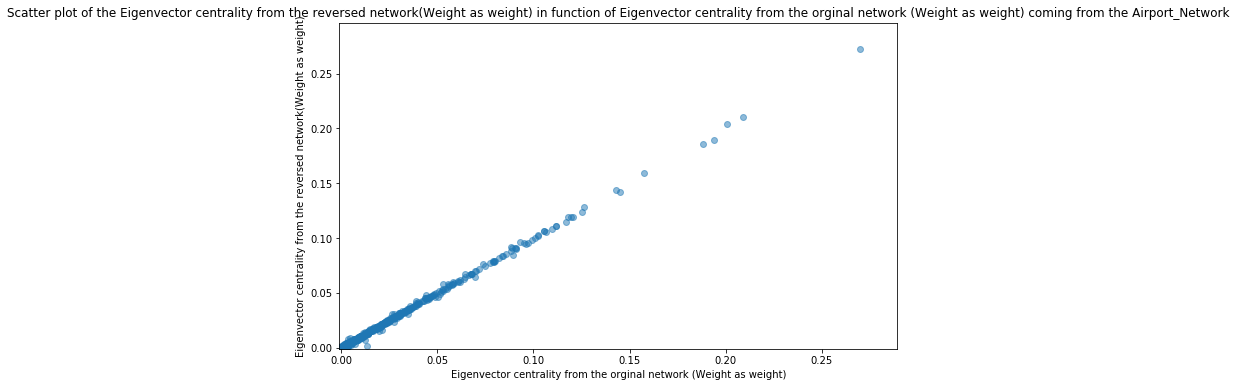

The Pearson Correlation coefficient (linear) for these two variable is 0.999506973013117
The Spearman Correlation coefficient (monotonic) for these two variable is 0.986951773606596


In [35]:
eigenvector_centrality_scores = []
reversed_eigenvector_centrality_scores = []

for node in Airport_Network.nodes():
    eigenvector_centrality_scores.append(centrality_measure['eigenvector_centrality_weighted'][node])
    reversed_eigenvector_centrality_scores.append(centrality_measure_reverse['eigenvector_centrality_weighted'][node])
    
ScatterPlot(eigenvector_centrality_scores,"Eigenvector centrality from the orginal network (Weight as weight)", reversed_eigenvector_centrality_scores, "Eigenvector centrality from the reversed network(Weight as weight)")

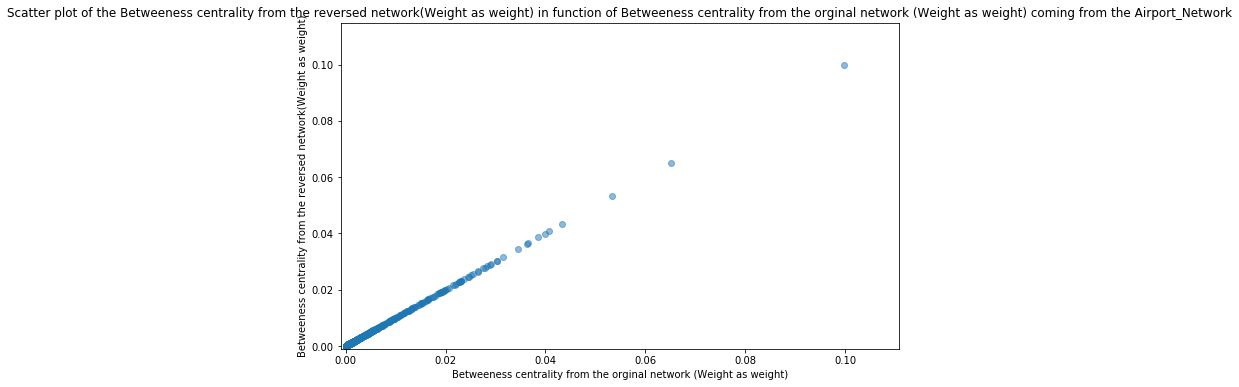

The Pearson Correlation coefficient (linear) for these two variable is 1.0
The Spearman Correlation coefficient (monotonic) for these two variable is 0.9999987602642475


In [36]:
betweeness_weighted_scores = []
reversed_betweeness_weighted_scores = []

for node in Airport_Network.nodes():
    betweeness_weighted_scores.append(centrality_measure['betweeness_centrality_weighted'][node])
    reversed_betweeness_weighted_scores.append(centrality_measure_reverse['betweeness_centrality_weighted'][node])
    
ScatterPlot(betweeness_weighted_scores,"Betweeness centrality from the orginal network (Weight as weight)", reversed_betweeness_weighted_scores, "Betweeness centrality from the reversed network(Weight as weight)")